In [1]:
import pandas as pd
import os
import random
import datetime

In [2]:
base_path = "./feature_image"
contestants = os.listdir(f"{base_path}")
contestants = [c for c in contestants if c.endswith('csv')]
add_data_path="./data_img_info_csv"

# Xử lý NA

In [3]:
for c in contestants:
    temp = pd.read_csv(f"{base_path}/{c}")
    temp = temp.dropna()
#     temp =temp .drop('Unnamed: 0',axis=1)
    temp['level'] = temp['level'].astype(float).astype(int)
    temp=temp.loc[:,~temp.columns.str.contains('Unnamed',regex=True)]
    os.remove(f"{base_path}/{c}")
    temp.to_csv(f"{base_path}/{c}", index=False)
temp

,anger,disgust,fear,happiness,sadness,surprise,neutral,AU01,AU02,AU04,...,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43,img_name,level
0,0.017239,0.015235,0.176891,0.341711,0.028478,0.004233,0.416213,0.601805,0.537354,0.211898,...,0.324528,1.0,0.297471,0.045166,0.989468,0.470132,0.182868,0.682754,./image/P14/P14_1659070888638.png,0
1,0.030872,0.009780,0.125229,0.264078,0.030885,0.006509,0.532647,0.546128,0.187422,0.341496,...,0.377041,0.0,0.628678,0.065833,0.990498,0.501712,0.313960,0.630475,./image/P14/P14_1659085749056.png,0
2,0.005416,0.013230,0.219520,0.173419,0.070296,0.011200,0.506919,0.464037,0.232327,0.461129,...,0.459882,1.0,0.479015,0.245514,0.990322,0.193106,0.368260,0.850828,./image/P14/P14_1659684037468.png,0
3,0.007522,0.009384,0.454181,0.181890,0.040242,0.030942,0.275839,0.508276,0.269019,0.458627,...,0.637235,1.0,0.819013,0.641877,0.937381,0.077706,0.319819,0.190604,./image/P14/P14_1659265517964.png,0
4,0.024187,0.010670,0.089908,0.288213,0.039413,0.003910,0.543699,0.591552,0.371097,0.553130,...,0.369656,1.0,0.342236,0.050512,0.979466,0.422746,0.056997,0.569246,./image/P14/P14_1658984695198.png,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.040957,0.010263,0.068325,0.171963,0.032893,0.004782,0.670815,0.792422,0.662862,0.146113,...,0.280971,1.0,0.254034,0.063396,0.983158,0.445436,0.105169,0.638492,./image/P14/P14_1659279866187.png,0
1916,0.009720,0.003048,0.145236,0.122815,0.060651,0.007962,0.650567,0.637243,0.314642,0.136442,...,0.389752,0.0,0.760976,0.270353,0.974202,0.458458,0.115001,0.273430,./image/P14/P14_1659456638127.png,0
1917,0.029612,0.012102,0.202055,0.284258,0.032657,0.015629,0.423687,0.624641,0.367987,0.292672,...,0.322887,1.0,0.645095,0.068958,0.900835,0.509297,0.077086,0.406576,./image/P14/P14_1659456537639.png,0
1918,0.013094,0.010975,0.097032,0.256737,0.053264,0.009323,0.559576,0.672477,0.596553,0.303114,...,0.302141,1.0,0.547257,0.201306,0.998685,0.470552,0.115043,0.567455,./image/P14/P14_1659510069849.png,0


In [4]:
person=[c.split('_')[0] for c in contestants]
person=list(set(person))
for per in person:
    if len(contestants)<30:
        break
    contestant_split=[i for i in contestants if per in i]
    merge=[]
    for i in contestant_split:
        temp = pd.read_csv(f"{base_path}/{i}")
        os.remove(f"{base_path}/{i}")
        merge.append(temp)
    merge_df=pd.concat(merge,axis=0)
    merge_df=merge_df.reset_index(drop=True)
    merge_df.to_csv(f"{base_path}/{per}.csv", index=False)
#     break

In [5]:
depression = dict()
contestants = os.listdir(f"{base_path}")
contestants = [c for c in contestants if c.endswith('csv')]
for c in contestants:
    if not c.endswith('csv'):
        continue
    if c =='P27.csv':
        continue
    temp = pd.read_csv(f"{base_path}/{c}")
    depression[c] = list(temp["level"].unique())

In [6]:
depression.items()

dict_items([('P19.csv', [1]), ('P31.csv', [0]), ('P25.csv', [0]), ('P24.csv', [1]), ('P30.csv', [1]), ('P18.csv', [1]), ('P33.csv', [0]), ('P23.csv', [0]), ('P36.csv', [0]), ('P34.csv', [0]), ('P20.csv', [0]), ('P08.csv', [0]), ('P21.csv', [1, 0]), ('P35.csv', [0]), ('P38.csv', [0]), ('P10.csv', [0, 1]), ('P13.csv', [0]), ('P12.csv', [1]), ('P16.csv', [0]), ('P17.csv', [1]), ('P15.csv', [1, 0]), ('P29.csv', [0]), ('P28.csv', [0]), ('P14.csv', [0])])

In [7]:
([key for key, value in depression.items() if value[0] == 0 and len(value) == 1])

['P31.csv',
 'P25.csv',
 'P33.csv',
 'P23.csv',
 'P36.csv',
 'P34.csv',
 'P20.csv',
 'P08.csv',
 'P35.csv',
 'P38.csv',
 'P13.csv',
 'P16.csv',
 'P29.csv',
 'P28.csv',
 'P14.csv']

In [8]:
# (depression)
# len(os.listdir(base_path))

# Chia train test

In [9]:
contestants = os.listdir(f"{base_path}")
print(contestants)
contestants = [c for c in contestants if c.endswith('csv')]
print(contestants)

['P19.csv', 'P31.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', '.DS_Store', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
['P19.csv', 'P31.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']


In [10]:
random.seed(int.from_bytes(os.urandom(4), 'big'))
only1 = [key for key, value in depression.items() if value[0] == 1 and len(value) == 1]
only0 = [key for key, value in depression.items() if value[0] == 0 and len(value) == 1]
both = [key for key, value in depression.items() if len(value) == 2]
# both.pop('P17.csv')
contestants=[c for c in contestants if c.endswith('csv')]
testPerson = [int(random.choice(only1).split('.')[0].split('P')[1])] + [int(random.choice(only0).split('.')[0].split('P')[1])]
allPerson = [int(a.split('.')[0].split('P')[1]) for a in contestants]
trainPerson = [a for a in allPerson if a not in testPerson]
# testPerson = [8]
# trainPerson = [21]


In [11]:
all_data=[]
for i in contestants:
    all_data.append(pd.read_csv(f"{base_path}/{i}").dropna())
all_df_data=pd.concat(all_data,axis=0)
all_df_data

,anger,disgust,fear,happiness,sadness,surprise,neutral,AU01,AU02,AU04,...,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43,img_name,level
0,0.013205,0.005202,0.374994,0.102363,0.049852,0.018875,0.435509,0.713220,0.510258,0.059922,...,0.466907,0.0,0.535557,0.490966,0.935579,0.121045,0.333033,0.121158,./image/P19/P19_1659487998833.png,1
1,0.011412,0.002000,0.171314,0.144660,0.163057,0.040847,0.466711,0.674876,0.313608,0.280145,...,0.418187,1.0,0.635475,0.157254,0.975519,0.468108,0.318228,0.165630,./image/P19/P19_1659020214976.png,1
2,0.014839,0.025150,0.251343,0.275955,0.048502,0.013539,0.370671,0.538187,0.284743,0.386870,...,0.407967,1.0,0.589100,0.679930,0.900595,0.114604,0.304304,0.082065,./image/P19/P19_1659075503842.png,1
3,0.011381,0.001744,0.194381,0.039042,0.111313,0.022853,0.619285,0.711540,0.427390,0.073868,...,0.371300,0.0,0.498661,0.593501,0.636757,0.147229,0.222992,0.079755,./image/P19/P19_1659021205080.png,1
4,0.005302,0.002227,0.185530,0.082221,0.074113,0.005386,0.645222,0.608201,0.277692,0.214240,...,0.430974,1.0,0.397525,0.039843,0.996547,0.306116,0.034934,0.117396,./image/P19/P19_1659355704725.png,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.040957,0.010263,0.068325,0.171963,0.032893,0.004782,0.670815,0.792422,0.662862,0.146113,...,0.280971,1.0,0.254034,0.063396,0.983158,0.445436,0.105169,0.638492,./image/P14/P14_1659279866187.png,0
1916,0.009720,0.003048,0.145236,0.122815,0.060651,0.007962,0.650567,0.637243,0.314642,0.136442,...,0.389752,0.0,0.760976,0.270353,0.974202,0.458458,0.115001,0.273430,./image/P14/P14_1659456638127.png,0
1917,0.029612,0.012102,0.202055,0.284258,0.032657,0.015629,0.423687,0.624641,0.367987,0.292672,...,0.322887,1.0,0.645095,0.068958,0.900835,0.509297,0.077086,0.406576,./image/P14/P14_1659456537639.png,0
1918,0.013094,0.010975,0.097032,0.256737,0.053264,0.009323,0.559576,0.672477,0.596553,0.303114,...,0.302141,1.0,0.547257,0.201306,0.998685,0.470552,0.115043,0.567455,./image/P14/P14_1659510069849.png,0


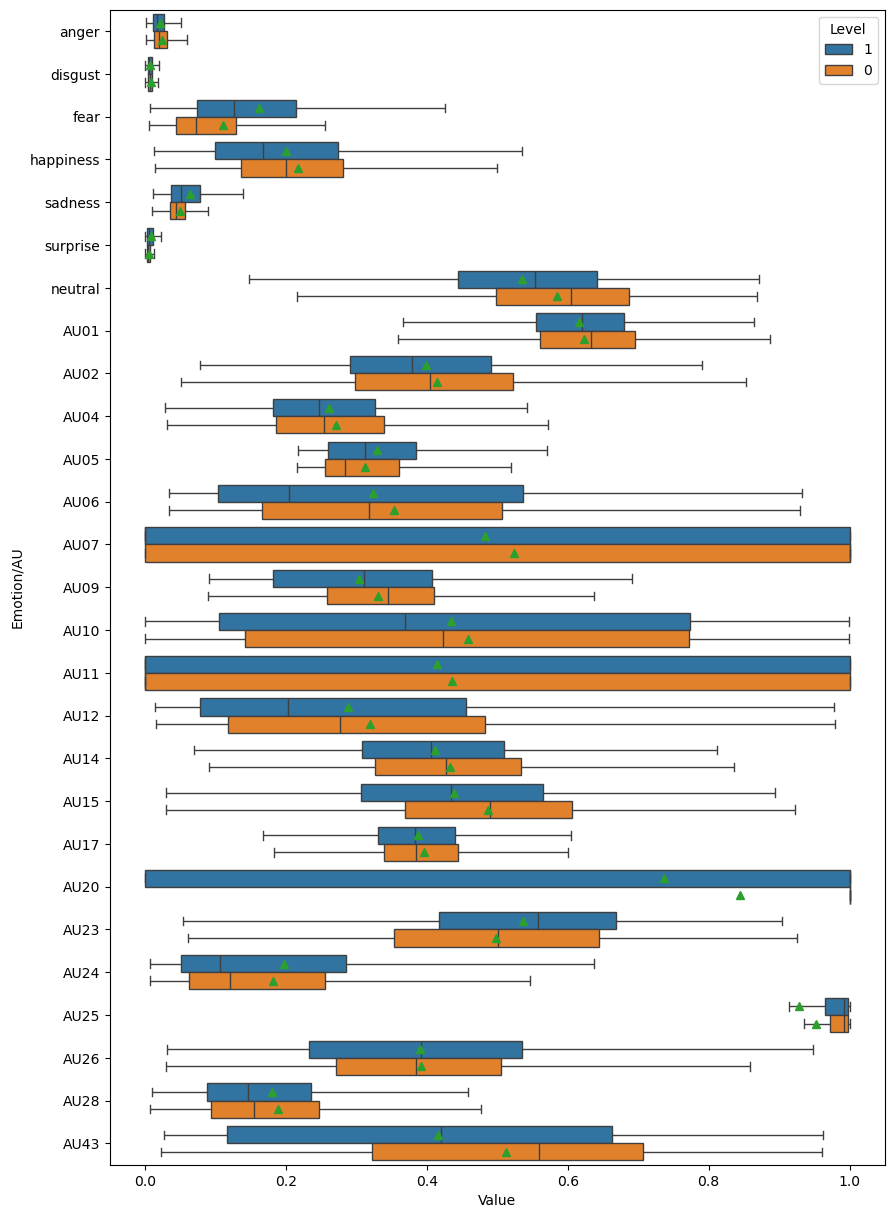

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
emotion_features = all_df_data.columns[:-2]#7
df_melted = pd.melt(all_df_data,
                    id_vars=['level'],           # keep the level column as identifier
                    value_vars=emotion_features, # the emotion feature columns to melt
                    var_name='emotion',          # new column for emotion names
                    value_name='value')          # new column for the corresponding values

# If your level values are continuous but you want to treat them as categories, you can convert them to strings:
df_melted['level'] = df_melted['level'].astype(str)

# Step 3: Plot using Seaborn
plt.figure(figsize=(10, 15))
sns.boxplot(y='emotion', x='value', hue='level', data=df_melted,showmeans=True,showfliers=False)
# plt.title("Emotion Feature Distributions by Level")
plt.xlabel("Value")
plt.ylabel("Emotion/AU") 
plt.legend(title="Level")
# plt.show()
# plt.draw()
plt.savefig('./image_paper/all_volunteer.png')

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsTransformer
from sklearn.cluster import DBSCAN
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,\
f1_score,precision_score,recall_score,roc_auc_score
from imblearn.over_sampling import SMOTE

k=1

f1=[]
accuracy=[]
precision=[]
recall=[]
roc_auc=[]
model=[]

testPersons=[['P31.csv','P19.csv'],
            ['P20.csv','P24.csv'],
            ['P13.csv','P30.csv'],#
            ['P31.csv','P18.csv'],
            ['P08.csv','P24.csv']#
#             both
            ]

sm=SMOTE()
for i in range(len(testPersons)):
    train_list=[]
    test_list=[]
    # Scramble
    random.seed(int.from_bytes(os.urandom(4), 'big'))
    only1 = [key for key, value in depression.items() if value[0] == 1 and len(value) == 1]
    only0 = [key for key, value in depression.items() if value[0] == 0 and len(value) == 1]
    both = [key for key, value in depression.items() if len(value) == 2]
    # testPerson = ['08'] + ['24']#['16','08'] + ['24','30']
#     testPerson = [random.choice(only0)] \
#     + [random.choice(only1)]
#     print(testPerson)
#     # testPerson = [13,17]
#     allPerson = [int(a.split('.')[0].split('P')[1]) for a in contestants]
#     trainPerson = [a for a in allPerson if str(a) not in testPerson]
#     testPerson = random.sample(only0,k) \
#     + random.sample(only1,k)
    testPerson=testPersons[i]
    # testPerson = [13,17]
    allPerson = contestants
    trainPerson = [a for a in allPerson if str(a) not in testPerson]

#     # Merge train data and shuffle
#     train_list = [pd.read_csv(f'{base_path}/P{str(num).zfill(2)}.csv') for num in trainPerson]
#     merged_train = pd.concat(train_list, ignore_index=True)
#     shuffled_train = merged_train.sample(frac=1, random_state=42).reset_index(drop=True)
#     shuffled_train = shuffled_train.drop([ 'img_name'], axis = 1)

#     test_list = [pd.read_csv(f'{base_path}/P{str(num).zfill(2)}.csv') for num in testPerson]
#     merged_test = pd.concat(test_list, ignore_index=True)
#     shuffled_test = merged_test.sample(frac=1, random_state=42).reset_index(drop=True)
#     shuffled_test = shuffled_test.drop([ 'img_name'], axis = 1)
    for num in trainPerson:
        train = pd.read_csv(f'{base_path}/{num}')
        train=train.set_index('img_name')
        duplicate_rows = train.index.duplicated()
        train=train.loc[~duplicate_rows,:]
        add_data=pd.read_csv(f'{add_data_path}/{num}')
        add_data=add_data.drop(['Unnamed: 0','level'],axis=1)
        add_data=add_data.set_index('img_name')
        duplicate_rows = add_data.index.duplicated()
        add_data=add_data.loc[~duplicate_rows,:]
        train_=pd.concat([train,add_data],axis=1)
        train_=train_.reset_index()
        train_=train_.dropna()
        train_=train_.drop(['timestamp','ID'],axis=1)
        train_list.append(train)#train_ for addition data
    
    merged_train = pd.concat(train_list, ignore_index=True)
    shuffled_train = merged_train.sample(frac=1, random_state=42).reset_index(drop=True)
    try:
        shuffled_train = shuffled_train.drop([ 'img_name'], axis = 1)
    except:pass   

    for num in testPerson:
        test = pd.read_csv(f'{base_path}/{num}')
        test=test.set_index('img_name')
        duplicate_rows = test.index.duplicated()
        test=test.loc[~duplicate_rows,:]
        add_data=pd.read_csv(f'{add_data_path}/{num}')
        add_data=add_data.drop(['Unnamed: 0','level'],axis=1)
        add_data=add_data.set_index('img_name')
        duplicate_rows = add_data.index.duplicated()
        add_data=add_data.loc[~duplicate_rows,:]
        test_=pd.concat([test,add_data],axis=1)
        test_=test_.reset_index()
        test_=test_.dropna()
        test_=test_.drop(['timestamp','ID'],axis=1)
        test=test.reset_index(drop=False)
        test_list.append(test)#test_ for addition data
    merged_test = pd.concat(test_list, ignore_index=True)
    shuffled_test = merged_test.sample(frac=1, random_state=42).reset_index(drop=True)
    try:
#         shuffled_test=shuffled_test.reset_index(drop=False)
        shuffled_test['ts']=shuffled_test['img_name'].apply(lambda x :int(int(x.split('_')[-1][:-4])/1000))
        shuffled_test['ts']=shuffled_test['ts'].apply(lambda x: datetime.datetime.fromtimestamp(x).date())
        shuffled_test = shuffled_test.drop(['img_name'], axis = 1)
        
    except Exception as e:print('!!!')

    for k in shuffled_test['ts'].unique():
        add_train_from_test1,shuffled_test1=shuffled_test[shuffled_test['ts']<k],shuffled_test[shuffled_test['ts']==k]
    #     add_train_from_test,shuffled_test=train_test_split(shuffled_test,test_size=0.5)
        add_train_from_test1,shuffled_test1=add_train_from_test1.drop('ts',axis=1),shuffled_test1.drop('ts',axis=1)
        shuffled_train=pd.concat([add_train_from_test1,shuffled_train],axis=0)


        X_train, y_train = shuffled_train.drop('level', axis = 1), shuffled_train['level']
#         print(X_train)
        X_test, y_test = shuffled_test1.drop('level', axis = 1), shuffled_test1['level']
        if shuffled_test1['level'].nunique()<2:
            continue
        y_train =y_train.astype('category')
        y_test =y_test.astype('category')
        X_train, y_train = sm.fit_resample(X_train, y_train)
#         print(X_train.isna().sum().sum())
        X_train=pd.DataFrame(X_train,columns=X_train.columns)
        X_test=X_test[X_train.columns]
    
        # y_train=pd.DataFrame(y_train,columns=y_test.columns)
        # Print train test contestants
        print("Train: ", trainPerson)
        print("Test: ", testPerson)


        # Logistic Regression
        # log_reg = LogisticRegression(max_iter=10000)
        # log_reg.fit(X_train, y_train)
        # log_reg_pred = log_reg.predict(X_test)
        # log_reg_acc = classification_report(y_test, log_reg_pred)
        # print(f"Logistic Regression Accuracy:", log_reg_acc)

        # K-Nearest Neighbors (KNN)
        knn = KNeighborsClassifier(n_neighbors=100)
        knn.fit(X_train, y_train)
        knn_pred = knn.predict(X_test)
        knn_rp = classification_report(y_test, knn_pred)
        accuracy.append(accuracy_score(y_test, knn_pred))
        f1.append(f1_score(y_test, knn_pred,average='macro'))
        precision.append(precision_score(y_test, knn_pred,average='macro'))
        recall.append(recall_score(y_test, knn_pred,average='macro'))
        roc_auc.append(roc_auc_score(y_test, knn_pred))
        model.append('KNN')
        print('knn ',i,'    ', k)
        print(knn_rp)


    #     # Support Vector Machine (SVM)
        svm =  XGBClassifier(n_estimators=100)#SVC(kernel='rbf')  # You can also try 'rbf' or 'poly'
        svm.fit(X_train, y_train)
        svm_pred = svm.predict(X_test)
        svm_rp = classification_report(y_test, svm_pred)
        accuracy.append(accuracy_score(y_test, svm_pred))
        f1.append(f1_score(y_test, svm_pred,average='macro'))
        precision.append(precision_score(y_test, svm_pred,average='macro'))
        recall.append(recall_score(y_test, svm_pred,average='macro'))
        roc_auc.append(roc_auc_score(y_test, svm_pred))
        model.append('XGB')
        print('XGB ',i,'    ', k)
        print(svm_rp)

        svm =  LogisticRegression()#SVC(kernel='rbf')  # You can also try 'rbf' or 'poly'
        svm.fit(X_train, y_train)
        svm_pred = svm.predict(X_test)
        svm_rp = classification_report(y_test, svm_pred)
        accuracy.append(accuracy_score(y_test, svm_pred))
        f1.append(f1_score(y_test, svm_pred,average='macro'))
        precision.append(precision_score(y_test, svm_pred,average='macro'))
        recall.append(recall_score(y_test, svm_pred,average='macro'))
        roc_auc.append(roc_auc_score(y_test, svm_pred))
        model.append('LR')
        print('LR ',i,'    ', k)
        print(svm_rp)

    #     # Random Forest Classifier
    #     rf = RandomForestClassifier(n_estimators=1000)
    #     rf.fit(X_train, y_train)
    #     rf_pred = rf.predict(X_test)
    #     rf_acc = classification_report(y_test, rf_pred)
    #     print('rf ',i)
    #     print(rf_acc)

    #     xgb = XGBClassifier(n_estimators=1000)
    #     xgb.fit(X_train, y_train)
    #     xgb_pred = xgb.predict(X_test)
    #     xgb_acc = classification_report(y_test, xgb_pred)
    #     print('xgb ',i)
    #     print(xgb_acc)

    #     # Neural Network (MLP Classifier)
    #     mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10000)
    #     mlp.fit(X_train, y_train)
    #     mlp_pred = mlp.predict(X_test)
    #     mlp_acc = classification_report(y_test, mlp_pred)
    #     print('MLP ',i)
    #     print(mlp_acc)


Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-12
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        34
           1       0.98      0.91      0.95        47

    accuracy                           0.94        81
   macro avg       0.93      0.94      0.94        81
weighted avg       0.94      0.94      0.94        81

XGB  0      2022-08-12
              precision    recall  f1-score   support

           0       0.60      0.91      0.72        34
           1       0.90      0.55      0.68        47

    accuracy                           0.70        81
   macro avg       0.75      0.73      0.70        81
weighted avg       0.77      0.70      0.70        81

LR  0   

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  0      2022-08-06
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        19

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-03
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        51
           1       0.98      1.00      0.99        59

    accuracy                           0.99       110
   macro avg       0.99      0.99      0.99       110
weighted avg       0.99      0.99      0.99       110

XGB  0   

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  0      2022-08-03
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        51
           1       0.91      0.90      0.91        59

    accuracy                           0.90       110
   macro avg       0.90      0.90      0.90       110
weighted avg       0.90      0.90      0.90       110

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-14
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        39
           1       0.93      0.93      0.93        42

    accuracy                           0.93        81
   macro avg       0.93      0.93      0.93        81
weighted avg       0.93      0.93      0.93        81

XGB  0   

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  0      2022-08-14
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        39
           1       0.90      0.86      0.88        42

    accuracy                           0.88        81
   macro avg       0.88      0.88      0.88        81
weighted avg       0.88      0.88      0.88        81

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-25
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.91      0.96        35

    accuracy                           0.93        46
   macro avg       0.89      0.96      0.92        46
weighted avg       0.95      0.93      0.94        46

XGB  0   

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  0      2022-08-25
              precision    recall  f1-score   support

           0       0.52      1.00      0.69        11
           1       1.00      0.71      0.83        35

    accuracy                           0.78        46
   macro avg       0.76      0.86      0.76        46
weighted avg       0.89      0.78      0.80        46

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-08
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00         5

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53

XGB  0   

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  0      2022-08-08
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00         5

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-21
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        37
           1       0.93      0.70      0.80        20

    accuracy                           0.88        57
   macro avg       0.90      0.84      0.86        57
weighted avg       0.88      0.88      0.87        57

XGB  0   

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  0      2022-08-21
              precision    recall  f1-score   support

           0       0.76      0.92      0.83        37
           1       0.75      0.45      0.56        20

    accuracy                           0.75        57
   macro avg       0.75      0.68      0.70        57
weighted avg       0.75      0.75      0.74        57

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-05
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        81
           1       0.97      1.00      0.98        58

    accuracy                           0.99       139
   macro avg       0.98      0.99      0.99       139
weighted avg       0.99      0.99      0.99       139

XGB  0   

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  0      2022-08-10
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       0.67      1.00      0.80         4

    accuracy                           0.96        54
   macro avg       0.83      0.98      0.89        54
weighted avg       0.98      0.96      0.97        54

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-20
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        45
           1       0.92      0.70      0.80        47

    accuracy                           0.82        92
   macro avg       0.83      0.82      0.81        92
weighted avg       0.84      0.82      0.81        92

XGB  0   

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  0      2022-08-20
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        45
           1       0.92      0.74      0.82        47

    accuracy                           0.84        92
   macro avg       0.85      0.84      0.84        92
weighted avg       0.85      0.84      0.84        92

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-19
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       0.94      0.94      0.94        18

    accuracy                           0.96        56
   macro avg       0.96      0.96      0.96        56
weighted avg       0.96      0.96      0.96        56

XGB  0   

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  0      2022-08-22
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.93      1.00      0.96        25

    accuracy                           0.93        29
   macro avg       0.96      0.75      0.81        29
weighted avg       0.94      0.93      0.92        29

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-17
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        21
           1       1.00      0.79      0.88        14

    accuracy                           0.91        35
   macro avg       0.94      0.89      0.91        35
weighted avg       0.93      0.91      0.91        35

XGB  0   

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  0      2022-08-17
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.93      0.96        14

    accuracy                           0.97        35
   macro avg       0.98      0.96      0.97        35
weighted avg       0.97      0.97      0.97        35

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-04
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        28

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

XGB  0   

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  0      2022-08-04
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.96      0.96      0.96        28

    accuracy                           0.94        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.94      0.94      0.94        36

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-17
              precision    recall  f1-score   support

           0       0.62      0.90      0.74        39
           1       0.98      0.91      0.94       223

    accuracy                           0.90       262
   macro avg       0.80      0.90      0.84       262
weighted avg       0.93      0.90      0.91       262

XGB  1   

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  1      2022-08-17
              precision    recall  f1-score   support

           0       0.50      0.90      0.64        39
           1       0.98      0.84      0.91       223

    accuracy                           0.85       262
   macro avg       0.74      0.87      0.77       262
weighted avg       0.91      0.85      0.87       262

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-06
              precision    recall  f1-score   support

           0       0.43      0.83      0.57        23
           1       0.98      0.90      0.94       243

    accuracy                           0.89       266
   macro avg       0.71      0.86      0.75       266
weighted avg       0.93      0.89      0.91       266

XGB  1   

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  1      2022-08-16
              precision    recall  f1-score   support

           0       0.27      0.83      0.41        30
           1       0.98      0.75      0.85       266

    accuracy                           0.76       296
   macro avg       0.63      0.79      0.63       296
weighted avg       0.90      0.76      0.81       296

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-01
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        23
           1       0.98      0.99      0.99       104

    accuracy                           0.98       127
   macro avg       0.97      0.95      0.96       127
weighted avg       0.98      0.98      0.98       127

XGB  1   

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  1      2022-08-01
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        23
           1       0.98      0.98      0.98       104

    accuracy                           0.97       127
   macro avg       0.95      0.95      0.95       127
weighted avg       0.97      0.97      0.97       127

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-07-30
              precision    recall  f1-score   support

           0       0.72      0.98      0.83        53
           1       0.99      0.88      0.93       166

    accuracy                           0.90       219
   macro avg       0.86      0.93      0.88       219
weighted avg       0.93      0.90      0.91       219

XGB  1   

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  1      2022-08-02
              precision    recall  f1-score   support

           0       0.21      0.90      0.34        10
           1       1.00      0.89      0.94       311

    accuracy                           0.89       321
   macro avg       0.60      0.90      0.64       321
weighted avg       0.97      0.89      0.92       321

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-07-31
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        15
           1       1.00      0.96      0.98       199

    accuracy                           0.97       214
   macro avg       0.84      0.98      0.90       214
weighted avg       0.98      0.97      0.97       214

XGB  1   

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  1      2022-08-04
              precision    recall  f1-score   support

           0       0.13      0.92      0.23        13
           1       0.99      0.71      0.83       276

    accuracy                           0.72       289
   macro avg       0.56      0.82      0.53       289
weighted avg       0.96      0.72      0.80       289

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-08
              precision    recall  f1-score   support

           0       0.59      0.94      0.73        35
           1       0.99      0.87      0.92       177

    accuracy                           0.88       212
   macro avg       0.79      0.91      0.83       212
weighted avg       0.92      0.88      0.89       212

XGB  1   

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  1      2022-08-08
              precision    recall  f1-score   support

           0       0.52      0.83      0.64        35
           1       0.96      0.85      0.90       177

    accuracy                           0.84       212
   macro avg       0.74      0.84      0.77       212
weighted avg       0.89      0.84      0.86       212

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-10
              precision    recall  f1-score   support

           0       0.33      0.88      0.48        25
           1       0.98      0.79      0.88       213

    accuracy                           0.80       238
   macro avg       0.66      0.84      0.68       238
weighted avg       0.91      0.80      0.84       238

XGB  1   

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  1      2022-08-10
              precision    recall  f1-score   support

           0       0.38      0.96      0.55        25
           1       0.99      0.82      0.90       213

    accuracy                           0.83       238
   macro avg       0.69      0.89      0.72       238
weighted avg       0.93      0.83      0.86       238

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-29
              precision    recall  f1-score   support

           0       0.33      0.79      0.47        14
           1       0.93      0.63      0.75        59

    accuracy                           0.66        73
   macro avg       0.63      0.71      0.61        73
weighted avg       0.81      0.66      0.69        73

XGB  1   

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  2      2022-08-02
              precision    recall  f1-score   support

           0       0.26      0.94      0.41        34
           1       0.95      0.31      0.47       131

    accuracy                           0.44       165
   macro avg       0.61      0.63      0.44       165
weighted avg       0.81      0.44      0.46       165

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P24.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P13.csv', 'P30.csv']
knn  2      2022-08-06
              precision    recall  f1-score   support

           0       0.74      0.88      0.80        95
           1       0.89      0.74      0.81       115

    accuracy                           0.80       210
   macro avg       0.81      0.81      0.80       210
weighted avg       0.82      0.80      0.80       210

XGB  2   

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  2      2022-08-06
              precision    recall  f1-score   support

           0       0.64      0.91      0.75        95
           1       0.88      0.58      0.70       115

    accuracy                           0.73       210
   macro avg       0.76      0.74      0.73       210
weighted avg       0.77      0.73      0.72       210

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P24.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P13.csv', 'P30.csv']
knn  2      2022-08-05
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        58
           1       1.00      0.81      0.90       145

    accuracy                           0.87       203
   macro avg       0.84      0.91      0.85       203
weighted avg       0.91      0.87      0.87       203

XGB  2   

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  2      2022-08-05
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        58
           1       1.00      0.74      0.85       145

    accuracy                           0.81       203
   macro avg       0.80      0.87      0.80       203
weighted avg       0.89      0.81      0.82       203

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P24.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P13.csv', 'P30.csv']
knn  2      2022-08-08
              precision    recall  f1-score   support

           0       0.68      0.99      0.80        77
           1       0.99      0.72      0.83       129

    accuracy                           0.82       206
   macro avg       0.83      0.85      0.82       206
weighted avg       0.87      0.82      0.82       206

XGB  2   

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  2      2022-08-08
              precision    recall  f1-score   support

           0       0.62      0.97      0.76        77
           1       0.98      0.64      0.78       129

    accuracy                           0.77       206
   macro avg       0.80      0.81      0.77       206
weighted avg       0.84      0.77      0.77       206

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P24.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P13.csv', 'P30.csv']
knn  2      2022-08-03
              precision    recall  f1-score   support

           0       0.73      1.00      0.85        66
           1       1.00      0.83      0.91       142

    accuracy                           0.88       208
   macro avg       0.87      0.92      0.88       208
weighted avg       0.92      0.88      0.89       208

XGB  2   

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  2      2022-08-03
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        66
           1       1.00      0.72      0.84       142

    accuracy                           0.81       208
   macro avg       0.81      0.86      0.80       208
weighted avg       0.88      0.81      0.81       208

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P24.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P13.csv', 'P30.csv']
knn  2      2022-08-07
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        55
           1       0.98      0.91      0.94       151

    accuracy                           0.92       206
   macro avg       0.88      0.93      0.90       206
weighted avg       0.93      0.92      0.92       206

XGB  2   

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  2      2022-08-07
              precision    recall  f1-score   support

           0       0.75      0.98      0.85        55
           1       0.99      0.88      0.93       151

    accuracy                           0.91       206
   macro avg       0.87      0.93      0.89       206
weighted avg       0.93      0.91      0.91       206

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P24.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P13.csv', 'P30.csv']
knn  2      2022-08-04
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        68
           1       0.98      0.95      0.96       182

    accuracy                           0.95       250
   macro avg       0.92      0.95      0.94       250
weighted avg       0.95      0.95      0.95       250

XGB  2   

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  2      2022-08-04
              precision    recall  f1-score   support

           0       0.68      0.91      0.78        68
           1       0.96      0.84      0.90       182

    accuracy                           0.86       250
   macro avg       0.82      0.88      0.84       250
weighted avg       0.89      0.86      0.87       250

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P24.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P13.csv', 'P30.csv']
knn  2      2022-08-09
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        75
           1       0.99      0.88      0.93       177

    accuracy                           0.91       252
   macro avg       0.88      0.93      0.90       252
weighted avg       0.92      0.91      0.91       252

XGB  2   

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  3      2022-08-14
              precision    recall  f1-score   support

           0       0.49      0.90      0.64        39
           1       0.95      0.68      0.79       113

    accuracy                           0.74       152
   macro avg       0.72      0.79      0.72       152
weighted avg       0.83      0.74      0.75       152

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-22
              precision    recall  f1-score   support

           0       0.10      0.25      0.14         4
           1       0.94      0.85      0.89        59

    accuracy                           0.81        63
   macro avg       0.52      0.55      0.52        63
weighted avg       0.89      0.81      0.85        63

XGB  3   

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  3      2022-08-22
              precision    recall  f1-score   support

           0       0.29      0.50      0.36         4
           1       0.96      0.92      0.94        59

    accuracy                           0.89        63
   macro avg       0.62      0.71      0.65        63
weighted avg       0.92      0.89      0.90        63

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-20
              precision    recall  f1-score   support

           0       0.64      0.91      0.75        45
           1       0.90      0.60      0.72        58

    accuracy                           0.74       103
   macro avg       0.77      0.76      0.74       103
weighted avg       0.79      0.74      0.74       103

XGB  3   

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  3      2022-08-20
              precision    recall  f1-score   support

           0       0.71      0.89      0.79        45
           1       0.89      0.72      0.80        58

    accuracy                           0.80       103
   macro avg       0.80      0.81      0.80       103
weighted avg       0.82      0.80      0.80       103

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-09
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.86      0.80      0.83        15

    accuracy                           0.94        78
   macro avg       0.91      0.88      0.89        78
weighted avg       0.93      0.94      0.94        78

XGB  3   

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-12
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        34
           1       0.96      0.77      0.86        31

    accuracy                           0.88        65
   macro avg       0.89      0.87      0.87        65
weighted avg       0.89      0.88      0.88        65

XGB  3      2022-08-12
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        31

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  3      2022-08-12
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        34
           1       0.96      0.74      0.84        31

    accuracy                           0.86        65
   macro avg       0.88      0.86      0.86        65
weighted avg       0.88      0.86      0.86        65

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-10
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        50
           1       0.94      1.00      0.97        49

    accuracy                           0.97        99
   macro avg       0.97      0.97      0.97        99
weighted avg       0.97      0.97      0.97        99

XGB  3   

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  3      2022-08-10
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        50
           1       0.88      1.00      0.93        49

    accuracy                           0.93        99
   macro avg       0.94      0.93      0.93        99
weighted avg       0.94      0.93      0.93        99

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-03
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        51
           1       0.94      0.91      0.93        34

    accuracy                           0.94        85
   macro avg       0.94      0.94      0.94        85
weighted avg       0.94      0.94      0.94        85

XGB  3   

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  3      2022-08-03
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        51
           1       0.81      0.74      0.77        34

    accuracy                           0.82        85
   macro avg       0.82      0.81      0.81        85
weighted avg       0.82      0.82      0.82        85

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-04
              precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       1.00      0.40      0.57         5

    accuracy                           0.77        13
   macro avg       0.86      0.70      0.71        13
weighted avg       0.83      0.77      0.74        13

XGB  3   

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  3      2022-08-04
              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.75      0.60      0.67         5

    accuracy                           0.77        13
   macro avg       0.76      0.74      0.75        13
weighted avg       0.77      0.77      0.76        13

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P08.csv', 'P24.csv']
knn  4      2022-08-02
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.95      0.97       311

    accuracy                           0.95       312
   macro avg       0.50      0.47      0.49       312
weighted avg       0.99      0.95      0.97       312

XGB  4   

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P08.csv', 'P24.csv']
knn  4      2022-08-16
              precision    recall  f1-score   support

           0       0.02      0.50      0.03         2
           1       1.00      0.79      0.88       266

    accuracy                           0.78       268
   macro avg       0.51      0.64      0.46       268
weighted avg       0.99      0.78      0.87       268

XGB  4      2022-08-16
              precision    recall  f1-score   support

           0       0.08      1.00      0.14         2
           1       1.00      0.91      0.95       266

    accuracy                           0.91       268
   macro avg       0.54      0.95      0.55       268
weighted avg       0.99      0.91      0.95       268

LR  4   

In [14]:
from sklearn.feature_selection import SelectKBest,f_regression
fs = SelectKBest(score_func=f_regression,k=15)
# Applying feature selection
fit = fs.fit(X_train,y_train)
features_score1 = pd.DataFrame(fit.pvalues_)
features1 = pd.DataFrame(X_train.columns)
feature_score1 = pd.concat([features1,features_score1],axis=1)
# Assigning column names
feature_score1.columns = ["Input_Features","p_values"]
feature_score1=feature_score1.sort_values('p_values', ascending=True)
print(feature_score1.to_string())

   Input_Features       p_values
13           AU09   0.000000e+00
22           AU24   0.000000e+00
21           AU23   0.000000e+00
20           AU20   0.000000e+00
18           AU15   0.000000e+00
17           AU14   0.000000e+00
16           AU12   0.000000e+00
14           AU10   0.000000e+00
12           AU07   0.000000e+00
11           AU06   0.000000e+00
26           AU43   0.000000e+00
8            AU02   0.000000e+00
7            AU01   0.000000e+00
5        surprise   0.000000e+00
4         sadness   0.000000e+00
3       happiness   0.000000e+00
2            fear   0.000000e+00
10           AU05   0.000000e+00
1         disgust  1.091137e-294
23           AU25  2.232551e-271
0           anger  2.854946e-204
24           AU26  3.511564e-166
25           AU28   5.249707e-88
6         neutral   2.150164e-86
9            AU04   2.130099e-36
15           AU11   5.995356e-02
19           AU17   2.759135e-01


In [15]:
X_train

,anger,disgust,fear,happiness,sadness,surprise,neutral,AU01,AU02,AU04,...,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
0,0.032766,0.013211,0.064100,0.233276,0.046855,0.002500,0.607292,0.443364,0.218667,0.289189,...,0.372050,0.252212,0.319805,1.0,0.293043,0.061991,0.998946,0.349615,0.069145,0.175351
1,0.019888,0.012265,0.089376,0.131485,0.048085,0.007125,0.691777,0.456801,0.232307,0.138910,...,0.342788,0.127112,0.417551,0.0,0.713131,0.491846,0.264327,0.143741,0.224265,0.086255
2,0.014963,0.004052,0.025901,0.276879,0.039396,0.001221,0.637588,0.467260,0.195741,0.204016,...,0.454676,0.488990,0.484938,0.0,0.814000,0.099745,0.975566,0.456625,0.230307,0.611950
3,0.013326,0.009135,0.200774,0.311167,0.078623,0.006795,0.380181,0.666445,0.405115,0.363413,...,0.161942,0.378741,0.334604,1.0,0.599387,0.060775,0.991776,0.578863,0.039744,0.316128
5,0.025835,0.005082,0.312836,0.069692,0.143381,0.025997,0.417178,0.581017,0.283933,0.176555,...,0.108471,0.058161,0.396856,0.0,0.527980,0.142062,0.898858,0.302182,0.083846,0.069602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30283,0.016241,0.024998,0.040158,0.605264,0.033068,0.003788,0.276482,0.742105,0.474951,0.246416,...,0.661033,0.103063,0.224619,1.0,0.250759,0.073020,0.999553,0.171607,0.099269,0.071555
30284,0.013162,0.010487,0.176290,0.142475,0.044099,0.007531,0.605955,0.555857,0.251840,0.232915,...,0.422490,0.114565,0.432122,0.0,0.707598,0.796577,0.493804,0.110874,0.100043,0.064350
30285,0.028272,0.003548,0.212114,0.143694,0.098697,0.119410,0.394266,0.626839,0.190283,0.424458,...,0.188635,0.459225,0.575657,0.0,0.478711,0.208023,0.974462,0.309109,0.304893,0.257993
30286,0.020716,0.007542,0.266233,0.152811,0.056463,0.006581,0.489655,0.553512,0.393145,0.270438,...,0.379909,0.394120,0.357959,1.0,0.612222,0.088821,0.984578,0.429370,0.045454,0.245766


In [16]:
# for num in trainPerson:
#     train = pd.read_csv(f'{base_path}/{num}')
#     train=train.set_index('img_name')
#     duplicate_rows = train.index.duplicated()
#     train=train.loc[~duplicate_rows,:]
#     add_data=train.copy()
#     add_data=add_data.shift(1)
#     add_data.columns=[i+'_prev' for i in add_data.columns]
#     train_=pd.concat([train,add_data],axis=1)
#     train_=train_.reset_index()
#     train_=train_.dropna()
# #     train_=train_.drop(['timestamp','ID'],axis=1)
#     break
# train_

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsTransformer
from sklearn.cluster import DBSCAN
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,\
f1_score,precision_score,recall_score,roc_auc_score
from imblearn.over_sampling import SMOTE

k=1

# f1=[]
# accuracy=[]
# precision=[]
# recall=[]
# roc_auc=[]
# model=[]
# testPersons=[['P31.csv','P19.csv'],
#             ['P14.csv','P24.csv'],
#             ['P13.csv','P30.csv'],
#             ['P31.csv','P18.csv'],
#             ['P08.csv','P24.csv']]
sm=SMOTE()
j=True
for i in range(len(testPersons)):
    train_list=[]
    test_list=[]
    # Scramble
    random.seed(int.from_bytes(os.urandom(4), 'big'))
    only1 = [key for key, value in depression.items() if value[0] == 1 and len(value) == 1]
    only0 = [key for key, value in depression.items() if value[0] == 0 and len(value) == 1]
    both = [key for key, value in depression.items() if len(value) == 2]
    # testPerson = ['08'] + ['24']#['16','08'] + ['24','30']
#     testPerson = [str(random.choice(only0).split('.')[0].split('P')[1])] \
#     + [str(random.choice(only1).split('.')[0].split('P')[1])]
#     # testPerson = [13,17]
#     allPerson = [int(a.split('.')[0].split('P')[1]) for a in contestants]
#     trainPerson = [a for a in allPerson if str(a) not in testPerson]
#     testPerson = random.sample(only0,k) \
#     + random.sample(only1,k)
    testPerson=testPersons[i]
    # testPerson = [13,17]
    allPerson = contestants
    trainPerson = [a for a in allPerson if str(a) not in testPerson]

#     # Merge train data and shuffle
#     train_list = [pd.read_csv(f'{base_path}/P{str(num).zfill(2)}.csv') for num in trainPerson]
#     merged_train = pd.concat(train_list, ignore_index=True)
#     shuffled_train = merged_train.sample(frac=1, random_state=42).reset_index(drop=True)
#     shuffled_train = shuffled_train.drop([ 'img_name'], axis = 1)

#     test_list = [pd.read_csv(f'{base_path}/P{str(num).zfill(2)}.csv') for num in testPerson]
#     merged_test = pd.concat(test_list, ignore_index=True)
#     shuffled_test = merged_test.sample(frac=1, random_state=42).reset_index(drop=True)
#     shuffled_test = shuffled_test.drop([ 'img_name'], axis = 1)
    for num in trainPerson:
        train = pd.read_csv(f'{base_path}/{num}')
        train=train.set_index('img_name')
        duplicate_rows = train.index.duplicated()
        train=train.loc[~duplicate_rows,:]
        train_addata=train.copy()
        train=train.drop('level',axis=1)
        add_data=train.copy()
        
        add_data=add_data.shift(1)
        add_data.columns=[i.split('_')[0]+'_time_lag' for i in train.columns]
        
#         add_data2=add_data.shift(2)
#         add_data2.columns=[i+'_prev2' for i in add_data.columns]

        add_vel=add_data.diff(1)
        add_vel.columns=[i+'_vel' for i in train.columns]
        
#         duplicate_rows = add_data.index.duplicated()
        train_=pd.concat([train_addata,add_data,add_vel],axis=1)
        train_=train_.reset_index()
        train_=train_.dropna()
#         train_=train_.drop(['timestamp','ID'],axis=1)
        train_list.append(train_)#train_ for addition data
    
    merged_train = pd.concat(train_list, ignore_index=True)
    shuffled_train = merged_train.sample(frac=1, random_state=42).reset_index(drop=True)

    try:
        shuffled_train = shuffled_train.drop([ 'img_name'], axis = 1)
    except:pass   

    for num in testPerson:
        test = pd.read_csv(f'{base_path}/{num}')
        test=test.set_index('img_name')
        
        
        duplicate_rows = test.index.duplicated()
        test=test.loc[~duplicate_rows,:]
        test_add=test.copy()
        test=test.drop('level',axis=1)
        add_data=test.copy()
        
        add_data=add_data.shift(1)
        add_data.columns=[i.split('_')[0]+'_time_lag' for i in test.columns]

        add_vel=add_data.diff(1)
        add_vel.columns=[i+'_vel' for i in test.columns]
        
        duplicate_rows = add_data.index.duplicated()
        add_data=add_data.loc[~duplicate_rows,:]
        test_=pd.concat([test_add,add_data,add_vel],axis=1)
        test_=test_.reset_index()
        test_=test_.dropna()
#         test_=test_.reset_index(drop=False)
        test_list.append(test_)#test_ for addition data
    merged_test = pd.concat(test_list, ignore_index=True)
#     print(merged_test)
    shuffled_test = merged_test.sample(frac=1, random_state=42).reset_index(drop=True)
    try:
#         shuffled_test=shuffled_test.reset_index(drop=False)
        shuffled_test['ts']=shuffled_test['img_name'].apply(lambda x :int(int(x.split('_')[-1][:-4])/1000))
        shuffled_test['ts']=shuffled_test['ts'].apply(lambda x: datetime.datetime.fromtimestamp(x).date())
        shuffled_test = shuffled_test.drop(['img_name'], axis = 1)
        
    except Exception as e:print(e)
    print(X_train.columns)
    for k in shuffled_test['ts'].unique():
        add_train_from_test1,shuffled_test1=shuffled_test[shuffled_test['ts']<k],shuffled_test[shuffled_test['ts']==k]
    #     add_train_from_test,shuffled_test=train_test_split(shuffled_test,test_size=0.5)
        add_train_from_test1,shuffled_test1=add_train_from_test1.drop('ts',axis=1),shuffled_test1.drop('ts',axis=1)
        shuffled_train=pd.concat([add_train_from_test1,shuffled_train],axis=0)

        X_train, y_train = shuffled_train.drop('level', axis = 1), shuffled_train['level']
        
        X_test, y_test = shuffled_test1.drop('level', axis = 1), shuffled_test1['level']
        y_train =y_train.astype('category')
        y_test =y_test.astype('category')
        X_train, y_train = sm.fit_resample(X_train, y_train)
        X_train=pd.DataFrame(X_train,columns=X_train.columns)
        X_test=X_test[X_train.columns]
        if shuffled_test1['level'].nunique()<2:
            continue
        # y_train=pd.DataFrame(y_train,columns=y_test.columns)
        # Print train test contestants
        print("Train: ", trainPerson)
        print("Test: ", testPerson)
        if j:
            print(X_train.columns.T)
            j=False

        # Logistic Regression
        # log_reg = LogisticRegression(max_iter=10000)
        # log_reg.fit(X_train, y_train)
        # log_reg_pred = log_reg.predict(X_test)
        # log_reg_acc = classification_report(y_test, log_reg_pred)
        # print(f"Logistic Regression Accuracy:", log_reg_acc)

        # K-Nearest Neighbors (KNN)
        knn = KNeighborsClassifier(n_neighbors=100, leaf_size=70)
        knn.fit(X_train, y_train)
        knn_pred = knn.predict(X_test)
        knn_rp = classification_report(y_test, knn_pred)
        accuracy.append(accuracy_score(y_test, knn_pred))
        f1.append(f1_score(y_test, knn_pred,average='macro'))
        precision.append(precision_score(y_test, knn_pred,average='macro'))
        recall.append(recall_score(y_test, knn_pred,average='macro'))
        roc_auc.append(roc_auc_score(y_test, knn_pred))
        model.append('KNN_tlsd')
        print('knn ',i,'    ', k)
        print(knn_rp)


    #     # Support Vector Machine (SVM)
        svm =  XGBClassifier(n_estimators=100)#SVC(kernel='rbf')  # You can also try 'rbf' or 'poly'
        svm.fit(X_train, y_train)
        svm_pred = svm.predict(X_test)
        svm_rp = classification_report(y_test, svm_pred)
        accuracy.append(accuracy_score(y_test, svm_pred))
        f1.append(f1_score(y_test, svm_pred,average='macro'))
        precision.append(precision_score(y_test, svm_pred,average='macro'))
        recall.append(recall_score(y_test, svm_pred,average='macro'))
        roc_auc.append(roc_auc_score(y_test, svm_pred))
        model.append('XGB_tlsd')
        print('XGB_ ',i,'    ', k)
        print(svm_rp)


        svm =  LogisticRegression()#SVC(kernel='rbf')  # You can also try 'rbf' or 'poly'
        svm.fit(X_train, y_train)
        svm_pred = svm.predict(X_test)
        svm_rp = classification_report(y_test, svm_pred)
        accuracy.append(accuracy_score(y_test, svm_pred))
        f1.append(f1_score(y_test, svm_pred,average='macro'))
        precision.append(precision_score(y_test, svm_pred,average='macro'))
        recall.append(recall_score(y_test, svm_pred,average='macro'))
        roc_auc.append(roc_auc_score(y_test, svm_pred))
        model.append('LR_tlsd')
        print('LR_ ',i,'    ', k)
        print(svm_rp)

#     # Random Forest Classifier
#     rf = RandomForestClassifier(n_estimators=1000)
#     rf.fit(X_train, y_train)
#     rf_pred = rf.predict(X_test)
#     rf_acc = classification_report(y_test, rf_pred)
#     print('rf ',i)
#     print(rf_acc)

#     xgb = XGBClassifier(n_estimators=1000)
#     xgb.fit(X_train, y_train)
#     xgb_pred = xgb.predict(X_test)
#     xgb_acc = classification_report(y_test, xgb_pred)
#     print('xgb ',i)
#     print(xgb_acc)

#     # Neural Network (MLP Classifier)
#     mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10000)
#     mlp.fit(X_train, y_train)
#     mlp_pred = mlp.predict(X_test)
#     mlp_acc = classification_report(y_test, mlp_pred)
#     print('MLP ',i)
#     print(mlp_acc)


Index(['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise',
       'neutral', 'AU01', 'AU02', 'AU04', 'AU05', 'AU06', 'AU07', 'AU09',
       'AU10', 'AU11', 'AU12', 'AU14', 'AU15', 'AU17', 'AU20', 'AU23', 'AU24',
       'AU25', 'AU26', 'AU28', 'AU43'],
      dtype='object')
Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
Index(['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise',
       'neutral', 'AU01', 'AU02', 'AU04', 'AU05', 'AU06', 'AU07', 'AU09',
       'AU10', 'AU11', 'AU12', 'AU14', 'AU15', 'AU17', 'AU20', 'AU23', 'AU24',
       'AU25', 'AU26', 'AU28', 'AU43', 'anger_time_lag', 'disgust_time_lag',
       'fear_time_lag', 'happiness_time_lag', 'sadness_time_lag',
       'surprise_time_lag', 'neutral_time_lag', 'AU01_t

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  0      2022-08-09
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        63
           1       0.96      0.76      0.85        33

    accuracy                           0.91        96
   macro avg       0.92      0.87      0.89        96
weighted avg       0.91      0.91      0.90        96

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-14
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        39
           1       0.93      0.88      0.90        42

    accuracy                           0.90        81
   macro avg       0.90      0.90      0.90        81
weighted avg       0.90      0.90      0.90        81

XGB_  0 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  0      2022-08-14
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        39
           1       0.97      0.93      0.95        42

    accuracy                           0.95        81
   macro avg       0.95      0.95      0.95        81
weighted avg       0.95      0.95      0.95        81

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-03
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        51
           1       0.97      0.97      0.97        58

    accuracy                           0.96       109
   macro avg       0.96      0.96      0.96       109
weighted avg       0.96      0.96      0.96       109

XGB_  0 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  0      2022-08-03
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       1.00      0.98      0.99        58

    accuracy                           0.99       109
   macro avg       0.99      0.99      0.99       109
weighted avg       0.99      0.99      0.99       109

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-10
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.80      1.00      0.89         4

    accuracy                           0.98        54
   macro avg       0.90      0.99      0.94        54
weighted avg       0.99      0.98      0.98        54

XGB_  0 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  0      2022-08-10
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         4

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-25
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.91      0.96        35

    accuracy                           0.93        46
   macro avg       0.89      0.96      0.92        46
weighted avg       0.95      0.93      0.94        46

XGB_  0 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  0      2022-08-25
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.94      0.97        35

    accuracy                           0.96        46
   macro avg       0.92      0.97      0.94        46
weighted avg       0.96      0.96      0.96        46

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-20
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        45
           1       1.00      0.85      0.92        47

    accuracy                           0.92        92
   macro avg       0.93      0.93      0.92        92
weighted avg       0.93      0.92      0.92        92

XGB_  0 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  0      2022-08-20
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       1.00      0.98      0.99        47

    accuracy                           0.99        92
   macro avg       0.99      0.99      0.99        92
weighted avg       0.99      0.99      0.99        92

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-05
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        81
           1       0.95      0.97      0.96        58

    accuracy                           0.96       139
   macro avg       0.96      0.96      0.96       139
weighted avg       0.96      0.96      0.96       139

XGB_  0 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  0      2022-08-05
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        81
           1       0.96      0.95      0.96        58

    accuracy                           0.96       139
   macro avg       0.96      0.96      0.96       139
weighted avg       0.96      0.96      0.96       139

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-21
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        37
           1       1.00      0.80      0.89        20

    accuracy                           0.93        57
   macro avg       0.95      0.90      0.92        57
weighted avg       0.94      0.93      0.93        57

XGB_  0 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  0      2022-08-21
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        37
           1       1.00      0.80      0.89        20

    accuracy                           0.93        57
   macro avg       0.95      0.90      0.92        57
weighted avg       0.94      0.93      0.93        57

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-04
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.93      0.96        28

    accuracy                           0.94        36
   macro avg       0.90      0.96      0.93        36
weighted avg       0.96      0.94      0.95        36

XGB_  0 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  0      2022-08-04
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.96      0.98        28

    accuracy                           0.97        36
   macro avg       0.94      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-12
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        33
           1       0.94      0.96      0.95        47

    accuracy                           0.94        80
   macro avg       0.94      0.93      0.94        80
weighted avg       0.94      0.94      0.94        80

XGB_  0 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  0      2022-08-12
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        47

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-19
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        38
           1       0.89      0.89      0.89        18

    accuracy                           0.93        56
   macro avg       0.92      0.92      0.92        56
weighted avg       0.93      0.93      0.93        56

XGB_  0 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  0      2022-08-19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        18

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-08
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.83      1.00      0.91         5

    accuracy                           0.98        53
   macro avg       0.92      0.99      0.95        53
weighted avg       0.98      0.98      0.98        53

XGB_  0 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  0      2022-08-08
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00         5

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-17
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        21
           1       1.00      0.64      0.78        14

    accuracy                           0.86        35
   macro avg       0.90      0.82      0.84        35
weighted avg       0.88      0.86      0.85        35

XGB_  0 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  0      2022-08-17
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.93      0.96        14

    accuracy                           0.97        35
   macro avg       0.98      0.96      0.97        35
weighted avg       0.97      0.97      0.97        35

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-06
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.95      1.00      0.97        19

    accuracy                           0.97        37
   macro avg       0.97      0.97      0.97        37
weighted avg       0.97      0.97      0.97        37

XGB_  0 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  0      2022-08-06
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        19

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-22
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.96      0.92      0.94        25

    accuracy                           0.90        29
   macro avg       0.78      0.83      0.80        29
weighted avg       0.91      0.90      0.90        29

XGB_  0 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  0      2022-08-22
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        25

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

Index(['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise',
       'neutral', 'AU01', 'AU02', 'AU04', 'AU05', 'AU06', 'AU07', 'AU09',
       'AU10', 'AU11', 'AU12', 'AU14', 'AU15', 'AU17', 'AU20', 'AU23', 'AU24',
       'AU25', 'AU26', 'AU28', 'AU43', 'anger_time_lag', 'disgust_time_lag',
       'fear_time_lag', 'happiness_time_lag', 'sadness_time_lag',
       'surprise_time_lag', 'neutral_time_lag', 'AU01_time_lag',
       'AU02_time_lag', 'AU04_time_lag', 'AU05_time_lag', 'AU06_time_lag',
       'AU07_time_lag', 'AU09_time_lag', 'AU10_time_lag', 'AU11_time_lag',
       'AU12_time_lag', 'AU14_time_lag', 'AU15_time_lag', 'AU17_time

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-08-01
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        23
           1       0.94      0.97      0.96       104

    accuracy                           0.93       127
   macro avg       0.90      0.86      0.87       127
weighted avg       0.93      0.93      0.93       127

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-16
              precision    recall  f1-score   support

           0       0.42      1.00      0.59        30
           1       1.00      0.85      0.92       266

    accuracy                           0.86       296
   macro avg       0.71      0.92      0.76       296
weighted avg       0.94      0.86      0.88       296

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-08-16
              precision    recall  f1-score   support

           0       0.52      0.83      0.64        30
           1       0.98      0.91      0.95       266

    accuracy                           0.91       296
   macro avg       0.75      0.87      0.79       296
weighted avg       0.93      0.91      0.91       296

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-07-30
              precision    recall  f1-score   support

           0       0.74      0.96      0.84        53
           1       0.99      0.89      0.94       166

    accuracy                           0.91       219
   macro avg       0.86      0.93      0.89       219
weighted avg       0.93      0.91      0.91       219

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-07-30
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        53
           1       0.96      0.95      0.95       166

    accuracy                           0.93       219
   macro avg       0.90      0.92      0.91       219
weighted avg       0.93      0.93      0.93       219

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-08
              precision    recall  f1-score   support

           0       0.60      0.97      0.74        35
           1       0.99      0.87      0.93       177

    accuracy                           0.89       212
   macro avg       0.80      0.92      0.83       212
weighted avg       0.93      0.89      0.90       212

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-08-08
              precision    recall  f1-score   support

           0       0.68      0.97      0.80        35
           1       0.99      0.91      0.95       177

    accuracy                           0.92       212
   macro avg       0.84      0.94      0.87       212
weighted avg       0.94      0.92      0.93       212

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-07
              precision    recall  f1-score   support

           0       0.24      0.86      0.38         7
           1       0.99      0.88      0.94       163

    accuracy                           0.88       170
   macro avg       0.62      0.87      0.66       170
weighted avg       0.96      0.88      0.91       170

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-08-07
              precision    recall  f1-score   support

           0       0.58      1.00      0.74         7
           1       1.00      0.97      0.98       163

    accuracy                           0.97       170
   macro avg       0.79      0.98      0.86       170
weighted avg       0.98      0.97      0.97       170

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-05
              precision    recall  f1-score   support

           0       0.14      0.88      0.24         8
           1       1.00      0.85      0.92       287

    accuracy                           0.85       295
   macro avg       0.57      0.86      0.58       295
weighted avg       0.97      0.85      0.90       295

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-08-05
              precision    recall  f1-score   support

           0       0.25      0.88      0.39         8
           1       1.00      0.93      0.96       287

    accuracy                           0.93       295
   macro avg       0.62      0.90      0.67       295
weighted avg       0.98      0.93      0.94       295

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-07-31
              precision    recall  f1-score   support

           0       0.57      0.87      0.68        15
           1       0.99      0.95      0.97       199

    accuracy                           0.94       214
   macro avg       0.78      0.91      0.83       214
weighted avg       0.96      0.94      0.95       214

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-07-31
              precision    recall  f1-score   support

           0       0.64      0.93      0.76        15
           1       0.99      0.96      0.98       199

    accuracy                           0.96       214
   macro avg       0.82      0.95      0.87       214
weighted avg       0.97      0.96      0.96       214

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-06
              precision    recall  f1-score   support

           0       0.36      1.00      0.53        21
           1       1.00      0.84      0.92       243

    accuracy                           0.86       264
   macro avg       0.68      0.92      0.72       264
weighted avg       0.95      0.86      0.88       264

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-08-06
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        21
           1       1.00      0.95      0.97       243

    accuracy                           0.95       264
   macro avg       0.82      0.98      0.88       264
weighted avg       0.97      0.95      0.96       264

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-04
              precision    recall  f1-score   support

           0       0.22      1.00      0.36        13
           1       1.00      0.83      0.91       276

    accuracy                           0.84       289
   macro avg       0.61      0.92      0.64       289
weighted avg       0.96      0.84      0.88       289

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-08-04
              precision    recall  f1-score   support

           0       0.28      0.92      0.43        13
           1       1.00      0.89      0.94       276

    accuracy                           0.89       289
   macro avg       0.64      0.91      0.68       289
weighted avg       0.96      0.89      0.92       289

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-10
              precision    recall  f1-score   support

           0       0.48      1.00      0.65        25
           1       1.00      0.87      0.93       213

    accuracy                           0.89       238
   macro avg       0.74      0.94      0.79       238
weighted avg       0.95      0.89      0.90       238

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-08-10
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        25
           1       1.00      0.93      0.96       213

    accuracy                           0.94       238
   macro avg       0.81      0.96      0.87       238
weighted avg       0.96      0.94      0.94       238

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-26
              precision    recall  f1-score   support

           0       0.64      0.84      0.73        19
           1       0.87      0.69      0.77        29

    accuracy                           0.75        48
   macro avg       0.75      0.77      0.75        48
weighted avg       0.78      0.75      0.75        48

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-08-26
              precision    recall  f1-score   support

           0       0.72      0.68      0.70        19
           1       0.80      0.83      0.81        29

    accuracy                           0.77        48
   macro avg       0.76      0.76      0.76        48
weighted avg       0.77      0.77      0.77        48

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-02
              precision    recall  f1-score   support

           0       0.23      1.00      0.38        10
           1       1.00      0.89      0.94       311

    accuracy                           0.90       321
   macro avg       0.62      0.95      0.66       321
weighted avg       0.98      0.90      0.93       321

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-08-02
              precision    recall  f1-score   support

           0       0.44      0.80      0.57        10
           1       0.99      0.97      0.98       311

    accuracy                           0.96       321
   macro avg       0.72      0.88      0.78       321
weighted avg       0.98      0.96      0.97       321

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-09
              precision    recall  f1-score   support

           0       0.44      1.00      0.62        36
           1       1.00      0.80      0.89       222

    accuracy                           0.83       258
   macro avg       0.72      0.90      0.75       258
weighted avg       0.92      0.83      0.85       258

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-08-09
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        36
           1       1.00      0.92      0.96       222

    accuracy                           0.93       258
   macro avg       0.83      0.96      0.88       258
weighted avg       0.95      0.93      0.94       258

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-29
              precision    recall  f1-score   support

           0       0.45      1.00      0.62        14
           1       1.00      0.71      0.83        59

    accuracy                           0.77        73
   macro avg       0.73      0.86      0.73        73
weighted avg       0.89      0.77      0.79        73

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-08-29
              precision    recall  f1-score   support

           0       0.65      0.93      0.76        14
           1       0.98      0.88      0.93        59

    accuracy                           0.89        73
   macro avg       0.82      0.90      0.85        73
weighted avg       0.92      0.89      0.90        73

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-03
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        37
           1       1.00      0.90      0.95       297

    accuracy                           0.91       334
   macro avg       0.78      0.95      0.83       334
weighted avg       0.95      0.91      0.92       334

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-08-03
              precision    recall  f1-score   support

           0       0.69      0.97      0.81        37
           1       1.00      0.95      0.97       297

    accuracy                           0.95       334
   macro avg       0.84      0.96      0.89       334
weighted avg       0.96      0.95      0.95       334

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-17
              precision    recall  f1-score   support

           0       0.57      1.00      0.72        39
           1       1.00      0.87      0.93       223

    accuracy                           0.89       262
   macro avg       0.78      0.93      0.83       262
weighted avg       0.94      0.89      0.90       262

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-08-17
              precision    recall  f1-score   support

           0       0.76      1.00      0.87        39
           1       1.00      0.95      0.97       223

    accuracy                           0.95       262
   macro avg       0.88      0.97      0.92       262
weighted avg       0.96      0.95      0.96       262

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-15
              precision    recall  f1-score   support

           0       0.10      0.50      0.17         2
           1       0.98      0.84      0.90        55

    accuracy                           0.82        57
   macro avg       0.54      0.67      0.53        57
weighted avg       0.95      0.82      0.88        57

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-08-15
              precision    recall  f1-score   support

           0       0.14      0.50      0.22         2
           1       0.98      0.89      0.93        55

    accuracy                           0.88        57
   macro avg       0.56      0.70      0.58        57
weighted avg       0.95      0.88      0.91        57

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-11
              precision    recall  f1-score   support

           0       0.28      1.00      0.44         7
           1       1.00      0.81      0.89        94

    accuracy                           0.82       101
   macro avg       0.64      0.90      0.67       101
weighted avg       0.95      0.82      0.86       101

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-08-11
              precision    recall  f1-score   support

           0       0.50      0.86      0.63         7
           1       0.99      0.94      0.96        94

    accuracy                           0.93       101
   macro avg       0.74      0.90      0.80       101
weighted avg       0.95      0.93      0.94       101

Index(['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise',
       'neutral', 'AU01', 'AU02', 'AU04', 'AU05', 'AU06', 'AU07', 'AU09',
       'AU10', 'AU11', 'AU12', 'AU14', 'AU15', 'AU17', 'AU20', 'AU23', 'AU24',
       'AU25', 'AU26', 'AU28', 'AU43', 'anger_time_lag', 'disgust_time_lag',
       'fear_time_lag', 'happiness_time_lag', 'sadness_time_lag',
       'surprise_time_lag', 'neutral_time_lag', 'AU01_time_lag',
       'AU02_time_lag', 'AU04_time_lag', 'AU05_time_lag', 'AU06_time_lag',
       'AU07_time_lag', 'AU09_time_lag', 'AU10_time_lag', 'AU11_time_lag',
       'AU12_time_lag', 'AU14_time_lag', 'AU15_time_lag', 'AU17_time

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  2      2022-08-09
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        74
           1       1.00      0.80      0.89       177

    accuracy                           0.86       251
   macro avg       0.84      0.90      0.85       251
weighted avg       0.91      0.86      0.87       251

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P24.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P13.csv', 'P30.csv']
knn  2      2022-08-06
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        95
           1       1.00      0.77      0.87       115

    accuracy                           0.88       210
   macro avg       0.89      0.89      0.88       210
weighted avg       0.90      0.88      0.88       210

XGB_  2 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  2      2022-08-06
              precision    recall  f1-score   support

           0       0.82      0.99      0.90        95
           1       0.99      0.82      0.90       115

    accuracy                           0.90       210
   macro avg       0.90      0.90      0.90       210
weighted avg       0.91      0.90      0.90       210

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P24.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P13.csv', 'P30.csv']
knn  2      2022-08-07
              precision    recall  f1-score   support

           0       0.57      0.98      0.72        55
           1       0.99      0.73      0.84       151

    accuracy                           0.80       206
   macro avg       0.78      0.86      0.78       206
weighted avg       0.88      0.80      0.81       206

XGB_  2 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  2      2022-08-07
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        55
           1       1.00      0.86      0.93       151

    accuracy                           0.90       206
   macro avg       0.86      0.93      0.88       206
weighted avg       0.93      0.90      0.90       206

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P24.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P13.csv', 'P30.csv']
knn  2      2022-08-02
              precision    recall  f1-score   support

           0       0.58      1.00      0.73        34
           1       1.00      0.81      0.89       131

    accuracy                           0.85       165
   macro avg       0.79      0.90      0.81       165
weighted avg       0.91      0.85      0.86       165

XGB_  2 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  2      2022-08-02
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        34
           1       1.00      0.87      0.93       131

    accuracy                           0.90       165
   macro avg       0.83      0.94      0.87       165
weighted avg       0.93      0.90      0.90       165

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P24.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P13.csv', 'P30.csv']
knn  2      2022-08-08
              precision    recall  f1-score   support

           0       0.58      0.99      0.73        77
           1       0.99      0.57      0.72       129

    accuracy                           0.72       206
   macro avg       0.78      0.78      0.72       206
weighted avg       0.83      0.72      0.72       206

XGB_  2 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  2      2022-08-08
              precision    recall  f1-score   support

           0       0.79      1.00      0.89        77
           1       1.00      0.84      0.92       129

    accuracy                           0.90       206
   macro avg       0.90      0.92      0.90       206
weighted avg       0.92      0.90      0.90       206

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P24.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P13.csv', 'P30.csv']
knn  2      2022-08-04
              precision    recall  f1-score   support

           0       0.69      0.96      0.80        68
           1       0.98      0.84      0.91       182

    accuracy                           0.87       250
   macro avg       0.84      0.90      0.85       250
weighted avg       0.90      0.87      0.88       250

XGB_  2 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  2      2022-08-04
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        68
           1       1.00      0.88      0.94       182

    accuracy                           0.91       250
   macro avg       0.88      0.94      0.90       250
weighted avg       0.93      0.91      0.92       250

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P24.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P13.csv', 'P30.csv']
knn  2      2022-08-05
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        58
           1       1.00      0.73      0.84       145

    accuracy                           0.81       203
   macro avg       0.80      0.87      0.80       203
weighted avg       0.89      0.81      0.82       203

XGB_  2 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  2      2022-08-05
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        58
           1       1.00      0.85      0.92       145

    accuracy                           0.89       203
   macro avg       0.86      0.92      0.88       203
weighted avg       0.92      0.89      0.90       203

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P24.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P13.csv', 'P30.csv']
knn  2      2022-08-03
              precision    recall  f1-score   support

           0       0.71      0.98      0.83        66
           1       0.99      0.82      0.90       142

    accuracy                           0.87       208
   macro avg       0.85      0.90      0.86       208
weighted avg       0.90      0.87      0.87       208

XGB_  2 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  2      2022-08-03
              precision    recall  f1-score   support

           0       0.78      0.98      0.87        66
           1       0.99      0.87      0.93       142

    accuracy                           0.91       208
   macro avg       0.89      0.93      0.90       208
weighted avg       0.93      0.91      0.91       208

Index(['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise',
       'neutral', 'AU01', 'AU02', 'AU04', 'AU05', 'AU06', 'AU07', 'AU09',
       'AU10', 'AU11', 'AU12', 'AU14', 'AU15', 'AU17', 'AU20', 'AU23', 'AU24',
       'AU25', 'AU26', 'AU28', 'AU43', 'anger_time_lag', 'disgust_time_lag',
       'fear_time_lag', 'happiness_time_lag', 'sadness_time_lag',
       'surprise_time_lag', 'neutral_time_lag', 'AU01_time_lag',
       'AU02_time_lag', 'AU04_time_lag', 'AU05_time_lag', 'AU06_time_lag',
       'AU07_time_lag', 'AU09_time_lag', 'AU10_time_lag', 'AU11_time_lag',
       'AU12_time_lag', 'AU14_time_lag', 'AU15_time_lag', 'AU17_time

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  3      2022-08-12
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.84      0.91        31

    accuracy                           0.92        64
   macro avg       0.93      0.92      0.92        64
weighted avg       0.93      0.92      0.92        64

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-20
              precision    recall  f1-score   support

           0       0.73      0.98      0.84        45
           1       0.98      0.72      0.83        58

    accuracy                           0.83       103
   macro avg       0.86      0.85      0.83       103
weighted avg       0.87      0.83      0.83       103

XGB_  3 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  3      2022-08-20
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        45
           1       1.00      0.79      0.88        58

    accuracy                           0.88       103
   macro avg       0.89      0.90      0.88       103
weighted avg       0.91      0.88      0.88       103

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-10
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        50
           1       0.98      0.88      0.92        49

    accuracy                           0.93        99
   macro avg       0.93      0.93      0.93        99
weighted avg       0.93      0.93      0.93        99

XGB_  3 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  3      2022-08-10
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.98      0.99        49

    accuracy                           0.99        99
   macro avg       0.99      0.99      0.99        99
weighted avg       0.99      0.99      0.99        99

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-14
              precision    recall  f1-score   support

           0       0.62      0.87      0.72        39
           1       0.95      0.81      0.88       113

    accuracy                           0.83       152
   macro avg       0.78      0.84      0.80       152
weighted avg       0.86      0.83      0.84       152

XGB_  3 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  3      2022-08-14
              precision    recall  f1-score   support

           0       0.70      0.97      0.82        39
           1       0.99      0.86      0.92       113

    accuracy                           0.89       152
   macro avg       0.85      0.92      0.87       152
weighted avg       0.92      0.89      0.89       152

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-17
              precision    recall  f1-score   support

           0       0.44      0.95      0.61        21
           1       0.98      0.70      0.82        83

    accuracy                           0.75       104
   macro avg       0.71      0.83      0.71       104
weighted avg       0.87      0.75      0.77       104

XGB_  3 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  3      2022-08-17
              precision    recall  f1-score   support

           0       0.66      1.00      0.79        21
           1       1.00      0.87      0.93        83

    accuracy                           0.89       104
   macro avg       0.83      0.93      0.86       104
weighted avg       0.93      0.89      0.90       104

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-13
              precision    recall  f1-score   support

           0       0.80      0.98      0.88        46
           1       0.98      0.82      0.89        61

    accuracy                           0.89       107
   macro avg       0.89      0.90      0.89       107
weighted avg       0.90      0.89      0.89       107

XGB_  3 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  3      2022-08-13
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        46
           1       1.00      0.85      0.92        61

    accuracy                           0.92       107
   macro avg       0.92      0.93      0.92       107
weighted avg       0.93      0.92      0.92       107

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-11
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        70
           1       0.95      0.91      0.93        23

    accuracy                           0.97        93
   macro avg       0.96      0.95      0.96        93
weighted avg       0.97      0.97      0.97        93

XGB_  3 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  3      2022-08-11
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        70
           1       0.92      1.00      0.96        23

    accuracy                           0.98        93
   macro avg       0.96      0.99      0.97        93
weighted avg       0.98      0.98      0.98        93

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-08
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        48
           1       1.00      0.96      0.98       106

    accuracy                           0.97       154
   macro avg       0.96      0.98      0.97       154
weighted avg       0.98      0.97      0.97       154

XGB_  3 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  3      2022-08-08
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        48
           1       1.00      0.91      0.95       106

    accuracy                           0.94       154
   macro avg       0.91      0.95      0.93       154
weighted avg       0.95      0.94      0.94       154

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-05
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        81
           1       0.98      0.91      0.95        58

    accuracy                           0.96       139
   macro avg       0.96      0.95      0.96       139
weighted avg       0.96      0.96      0.96       139

XGB_  3 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  3      2022-08-05
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        81
           1       0.98      0.90      0.94        58

    accuracy                           0.95       139
   macro avg       0.96      0.94      0.95       139
weighted avg       0.95      0.95      0.95       139

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-09
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.86      0.80      0.83        15

    accuracy                           0.94        78
   macro avg       0.91      0.88      0.89        78
weighted avg       0.93      0.94      0.94        78

XGB_  3 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  3      2022-08-09
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.93      0.87      0.90        15

    accuracy                           0.96        78
   macro avg       0.95      0.93      0.94        78
weighted avg       0.96      0.96      0.96        78

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-03
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        51
           1       1.00      0.82      0.90        34

    accuracy                           0.93        85
   macro avg       0.95      0.91      0.92        85
weighted avg       0.94      0.93      0.93        85

XGB_  3 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  3      2022-08-03
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        51
           1       1.00      0.85      0.92        34

    accuracy                           0.94        85
   macro avg       0.96      0.93      0.94        85
weighted avg       0.95      0.94      0.94        85

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-19
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        38
           1       0.97      0.80      0.88        35

    accuracy                           0.89        73
   macro avg       0.90      0.89      0.89        73
weighted avg       0.90      0.89      0.89        73

XGB_  3 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  3      2022-08-19
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        38
           1       1.00      0.83      0.91        35

    accuracy                           0.92        73
   macro avg       0.93      0.91      0.92        73
weighted avg       0.93      0.92      0.92        73

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-22
              precision    recall  f1-score   support

           0       0.27      1.00      0.42         4
           1       1.00      0.81      0.90        59

    accuracy                           0.83        63
   macro avg       0.63      0.91      0.66        63
weighted avg       0.95      0.83      0.87        63

XGB_  3 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  3      2022-08-22
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.98      0.99        59

    accuracy                           0.98        63
   macro avg       0.90      0.99      0.94        63
weighted avg       0.99      0.98      0.98        63

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-04
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         5

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

XGB_  3 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  3      2022-08-04
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.60      0.75         5

    accuracy                           0.85        13
   macro avg       0.90      0.80      0.82        13
weighted avg       0.88      0.85      0.84        13

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-21
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        37
           1       0.83      0.83      0.83         6

    accuracy                           0.95        43
   macro avg       0.90      0.90      0.90        43
weighted avg       0.95      0.95      0.95        43

XGB_  3 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  3      2022-08-21
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        37
           1       1.00      0.50      0.67         6

    accuracy                           0.93        43
   macro avg       0.96      0.75      0.81        43
weighted avg       0.94      0.93      0.92        43

Index(['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise',
       'neutral', 'AU01', 'AU02', 'AU04', 'AU05', 'AU06', 'AU07', 'AU09',
       'AU10', 'AU11', 'AU12', 'AU14', 'AU15', 'AU17', 'AU20', 'AU23', 'AU24',
       'AU25', 'AU26', 'AU28', 'AU43', 'anger_time_lag', 'disgust_time_lag',
       'fear_time_lag', 'happiness_time_lag', 'sadness_time_lag',
       'surprise_time_lag', 'neutral_time_lag', 'AU01_time_lag',
       'AU02_time_lag', 'AU04_time_lag', 'AU05_time_lag', 'AU06_time_lag',
       'AU07_time_lag', 'AU09_time_lag', 'AU10_time_lag', 'AU11_time_lag',
       'AU12_time_lag', 'AU14_time_lag', 'AU15_time_lag', 'AU17_time

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  4      2022-07-31
              precision    recall  f1-score   support

           0       0.05      1.00      0.10         4
           1       1.00      0.63      0.77       199

    accuracy                           0.64       203
   macro avg       0.53      0.81      0.43       203
weighted avg       0.98      0.64      0.76       203

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P08.csv', 'P24.csv']
knn  4      2022-08-04
              precision    recall  f1-score   support

           0       0.04      0.33      0.07         6
           1       0.98      0.83      0.90       276

    accuracy                           0.82       282
   macro avg       0.51      0.58      0.49       282
weighted avg       0.96      0.82      0.88       282

XGB_  4 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  4      2022-08-04
              precision    recall  f1-score   support

           0       0.02      0.33      0.03         6
           1       0.98      0.61      0.75       276

    accuracy                           0.60       282
   macro avg       0.50      0.47      0.39       282
weighted avg       0.96      0.60      0.73       282

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P08.csv', 'P24.csv']
knn  4      2022-08-10
              precision    recall  f1-score   support

           0       0.24      0.67      0.36        12
           1       0.98      0.88      0.93       213

    accuracy                           0.87       225
   macro avg       0.61      0.77      0.64       225
weighted avg       0.94      0.87      0.90       225

XGB_  4 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  4      2022-08-10
              precision    recall  f1-score   support

           0       0.08      0.17      0.11        12
           1       0.95      0.90      0.92       213

    accuracy                           0.86       225
   macro avg       0.52      0.53      0.52       225
weighted avg       0.90      0.86      0.88       225

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P08.csv', 'P24.csv']
knn  4      2022-08-16
              precision    recall  f1-score   support

           0       0.04      1.00      0.07         2
           1       1.00      0.80      0.89       266

    accuracy                           0.80       268
   macro avg       0.52      0.90      0.48       268
weighted avg       0.99      0.80      0.88       268

XGB_  4 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  4      2022-08-16
              precision    recall  f1-score   support

           0       0.03      0.50      0.06         2
           1       1.00      0.89      0.94       266

    accuracy                           0.89       268
   macro avg       0.51      0.70      0.50       268
weighted avg       0.99      0.89      0.93       268

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P08.csv', 'P24.csv']
knn  4      2022-07-30
              precision    recall  f1-score   support

           0       0.05      0.25      0.08         4
           1       0.98      0.87      0.92       166

    accuracy                           0.86       170
   macro avg       0.51      0.56      0.50       170
weighted avg       0.96      0.86      0.90       170

XGB_  4 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  4      2022-07-30
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.97      0.90      0.94       166

    accuracy                           0.88       170
   macro avg       0.49      0.45      0.47       170
weighted avg       0.95      0.88      0.92       170

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P08.csv', 'P24.csv']
knn  4      2022-08-11
              precision    recall  f1-score   support

           0       0.13      0.75      0.22         4
           1       0.99      0.79      0.88        94

    accuracy                           0.79        98
   macro avg       0.56      0.77      0.55        98
weighted avg       0.95      0.79      0.85        98

XGB_  4 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  4      2022-08-11
              precision    recall  f1-score   support

           0       0.25      0.75      0.38         4
           1       0.99      0.90      0.94        94

    accuracy                           0.90        98
   macro avg       0.62      0.83      0.66        98
weighted avg       0.96      0.90      0.92        98

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P08.csv', 'P24.csv']
knn  4      2022-08-02
              precision    recall  f1-score   support

           0       0.03      1.00      0.05         1
           1       1.00      0.87      0.93       311

    accuracy                           0.88       312
   macro avg       0.51      0.94      0.49       312
weighted avg       1.00      0.88      0.93       312

XGB_  4 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  4      2022-08-02
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.95      0.97       311

    accuracy                           0.95       312
   macro avg       0.50      0.48      0.49       312
weighted avg       0.99      0.95      0.97       312

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P08.csv', 'P24.csv']
knn  4      2022-08-08
              precision    recall  f1-score   support

           0       0.07      0.50      0.13         4
           1       0.99      0.86      0.92       177

    accuracy                           0.85       181
   macro avg       0.53      0.68      0.52       181
weighted avg       0.97      0.85      0.90       181

XGB_  4 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  4      2022-08-08
              precision    recall  f1-score   support

           0       0.10      0.50      0.16         4
           1       0.99      0.89      0.94       177

    accuracy                           0.88       181
   macro avg       0.54      0.70      0.55       181
weighted avg       0.97      0.88      0.92       181

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P08.csv', 'P24.csv']
knn  4      2022-08-05
              precision    recall  f1-score   support

           0       0.05      0.60      0.10         5
           1       0.99      0.81      0.89       287

    accuracy                           0.80       292
   macro avg       0.52      0.70      0.49       292
weighted avg       0.98      0.80      0.88       292

XGB_  4 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  4      2022-08-05
              precision    recall  f1-score   support

           0       0.05      0.40      0.09         5
           1       0.99      0.87      0.92       287

    accuracy                           0.86       292
   macro avg       0.52      0.63      0.51       292
weighted avg       0.97      0.86      0.91       292

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P08.csv', 'P24.csv']
knn  4      2022-08-06
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      0.80      0.89       243

    accuracy                           0.80       244
   macro avg       0.50      0.40      0.44       244
weighted avg       0.99      0.80      0.88       244

XGB_  4 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  4      2022-08-06
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.89      0.94       243

    accuracy                           0.89       244
   macro avg       0.50      0.45      0.47       244
weighted avg       0.99      0.89      0.94       244

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P08.csv', 'P24.csv']
knn  4      2022-08-01
              precision    recall  f1-score   support

           0       0.35      0.86      0.50         7
           1       0.99      0.89      0.94       104

    accuracy                           0.89       111
   macro avg       0.67      0.88      0.72       111
weighted avg       0.95      0.89      0.91       111

XGB_  4 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  4      2022-08-01
              precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.95      0.98      0.97       104

    accuracy                           0.94       111
   macro avg       0.73      0.63      0.67       111
weighted avg       0.92      0.94      0.93       111

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P08.csv', 'P24.csv']
knn  4      2022-08-15
              precision    recall  f1-score   support

           0       0.45      0.90      0.60        10
           1       0.98      0.80      0.88        55

    accuracy                           0.82        65
   macro avg       0.71      0.85      0.74        65
weighted avg       0.90      0.82      0.84        65

XGB_  4 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  4      2022-08-15
              precision    recall  f1-score   support

           0       0.44      0.40      0.42        10
           1       0.89      0.91      0.90        55

    accuracy                           0.83        65
   macro avg       0.67      0.65      0.66        65
weighted avg       0.82      0.83      0.83        65



In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsTransformer
from sklearn.cluster import DBSCAN
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,\
f1_score,precision_score,recall_score,roc_auc_score
from imblearn.over_sampling import SMOTE

k=1

# f1=[]
# accuracy=[]
# precision=[]
# recall=[]
# roc_auc=[]
# model=[]
# testPersons=[['P31.csv','P19.csv'],
#             ['P14.csv','P24.csv'],
#             ['P13.csv','P30.csv'],
#             ['P31.csv','P18.csv'],
#             ['P08.csv','P24.csv']]
sm=SMOTE()
j=True
for i in range(len(testPersons)):
    train_list=[]
    test_list=[]
    # Scramble
    random.seed(int.from_bytes(os.urandom(4), 'big'))
    only1 = [key for key, value in depression.items() if value[0] == 1 and len(value) == 1]
    only0 = [key for key, value in depression.items() if value[0] == 0 and len(value) == 1]
    both = [key for key, value in depression.items() if len(value) == 2]
    # testPerson = ['08'] + ['24']#['16','08'] + ['24','30']
#     testPerson = [str(random.choice(only0).split('.')[0].split('P')[1])] \
#     + [str(random.choice(only1).split('.')[0].split('P')[1])]
#     # testPerson = [13,17]
#     allPerson = [int(a.split('.')[0].split('P')[1]) for a in contestants]
#     trainPerson = [a for a in allPerson if str(a) not in testPerson]
#     testPerson = random.sample(only0,k) \
#     + random.sample(only1,k)
    testPerson=testPersons[i]
    # testPerson = [13,17]
    allPerson = contestants
    trainPerson = [a for a in allPerson if str(a) not in testPerson]

#     # Merge train data and shuffle
#     train_list = [pd.read_csv(f'{base_path}/P{str(num).zfill(2)}.csv') for num in trainPerson]
#     merged_train = pd.concat(train_list, ignore_index=True)
#     shuffled_train = merged_train.sample(frac=1, random_state=42).reset_index(drop=True)
#     shuffled_train = shuffled_train.drop([ 'img_name'], axis = 1)

#     test_list = [pd.read_csv(f'{base_path}/P{str(num).zfill(2)}.csv') for num in testPerson]
#     merged_test = pd.concat(test_list, ignore_index=True)
#     shuffled_test = merged_test.sample(frac=1, random_state=42).reset_index(drop=True)
#     shuffled_test = shuffled_test.drop([ 'img_name'], axis = 1)
    for num in trainPerson:
        train = pd.read_csv(f'{base_path}/{num}')
        train=train.set_index('img_name')
        duplicate_rows = train.index.duplicated()
        train=train.loc[~duplicate_rows,:]
        train_addata=train.copy()
        train=train.drop('level',axis=1)
        add_data=train.copy()
        
        add_data=add_data.shift(1)
        add_data.columns=[i.split('_')[0]+'_time_lag' for i in train.columns]
        
#         add_data2=add_data.shift(2)
#         add_data2.columns=[i+'_prev2' for i in add_data.columns]

        add_vel=add_data.diff(1)
        add_vel.columns=[i+'_vel' for i in train.columns]
        
#         duplicate_rows = add_data.index.duplicated()
        train_=pd.concat([train_addata,add_data],axis=1)
        train_=train_.reset_index()
        train_=train_.dropna()
#         train_=train_.drop(['timestamp','ID'],axis=1)
        train_list.append(train_)#train_ for addition data
    
    merged_train = pd.concat(train_list, ignore_index=True)
    shuffled_train = merged_train.sample(frac=1, random_state=42).reset_index(drop=True)

    try:
        shuffled_train = shuffled_train.drop([ 'img_name'], axis = 1)
    except:pass   

    for num in testPerson:
        test = pd.read_csv(f'{base_path}/{num}')
        test=test.set_index('img_name')
        
        
        duplicate_rows = test.index.duplicated()
        test=test.loc[~duplicate_rows,:]
        test_add=test.copy()
        test=test.drop('level',axis=1)
        add_data=test.copy()
        
        add_data=add_data.shift(1)
        add_data.columns=[i.split('_')[0]+'_time_lag' for i in test.columns]

        add_vel=add_data.diff(1)
        add_vel.columns=[i+'_vel' for i in test.columns]
        
        duplicate_rows = add_data.index.duplicated()
        add_data=add_data.loc[~duplicate_rows,:]
        test_=pd.concat([test_add,add_data],axis=1)
        test_=test_.reset_index()
        test_=test_.dropna()

        test_list.append(test_)#test_ for addition data
    merged_test = pd.concat(test_list, ignore_index=True)
    shuffled_test = merged_test.sample(frac=1, random_state=42).reset_index(drop=True)
    try:
#         shuffled_test=shuffled_test.reset_index(drop=False)
        shuffled_test['ts']=shuffled_test['img_name'].apply(lambda x :int(int(x.split('_')[-1][:-4])/1000))
        shuffled_test['ts']=shuffled_test['ts'].apply(lambda x: datetime.datetime.fromtimestamp(x).date())
        shuffled_test = shuffled_test.drop(['img_name'], axis = 1)
        
    except Exception as e:print(e)
    for k in shuffled_test['ts'].unique():
        add_train_from_test1,shuffled_test1=shuffled_test[shuffled_test['ts']<k],shuffled_test[shuffled_test['ts']==k]
    #     add_train_from_test,shuffled_test=train_test_split(shuffled_test,test_size=0.5)
        add_train_from_test1,shuffled_test1=add_train_from_test1.drop('ts',axis=1),shuffled_test1.drop('ts',axis=1)
        shuffled_train=pd.concat([add_train_from_test1,shuffled_train],axis=0)

        X_train, y_train = shuffled_train.drop('level', axis = 1), shuffled_train['level']

        X_test, y_test = shuffled_test1.drop('level', axis = 1), shuffled_test1['level']
        y_train =y_train.astype('category')
        y_test =y_test.astype('category')
        X_train, y_train = sm.fit_resample(X_train, y_train)
        X_train=pd.DataFrame(X_train,columns=X_train.columns)
        X_test=X_test[X_train.columns]
        if shuffled_test1['level'].nunique()<2:
            continue
        # y_train=pd.DataFrame(y_train,columns=y_test.columns)
        # Print train test contestants
        print("Train: ", trainPerson)
        print("Test: ", testPerson)
        if j:
            print(X_train.columns.T)
            j=False

        # Logistic Regression
        # log_reg = LogisticRegression(max_iter=10000)
        # log_reg.fit(X_train, y_train)
        # log_reg_pred = log_reg.predict(X_test)
        # log_reg_acc = classification_report(y_test, log_reg_pred)
        # print(f"Logistic Regression Accuracy:", log_reg_acc)

        # K-Nearest Neighbors (KNN)
        knn = KNeighborsClassifier(n_neighbors=100, leaf_size=70)
        knn.fit(X_train, y_train)
        knn_pred = knn.predict(X_test)
        knn_rp = classification_report(y_test, knn_pred)
        accuracy.append(accuracy_score(y_test, knn_pred))
        f1.append(f1_score(y_test, knn_pred,average='macro'))
        precision.append(precision_score(y_test, knn_pred,average='macro'))
        recall.append(recall_score(y_test, knn_pred,average='macro'))
        roc_auc.append(roc_auc_score(y_test, knn_pred))
        model.append('KNN_TL')
        print('knn ',i,'    ', k)
        print(knn_rp)


    #     # Support Vector Machine (SVM)
        svm =  XGBClassifier(n_estimators=100)#SVC(kernel='rbf')  # You can also try 'rbf' or 'poly'
        svm.fit(X_train, y_train)
        svm_pred = svm.predict(X_test)
        svm_rp = classification_report(y_test, svm_pred)
        accuracy.append(accuracy_score(y_test, svm_pred))
        f1.append(f1_score(y_test, svm_pred,average='macro'))
        precision.append(precision_score(y_test, svm_pred,average='macro'))
        recall.append(recall_score(y_test, svm_pred,average='macro'))
        roc_auc.append(roc_auc_score(y_test, svm_pred))
        model.append('XGB_TL')
        print('XGB_ ',i,'    ', k)
        print(svm_rp)


        svm =  LogisticRegression()#SVC(kernel='rbf')  # You can also try 'rbf' or 'poly'
        svm.fit(X_train, y_train)
        svm_pred = svm.predict(X_test)
        svm_rp = classification_report(y_test, svm_pred)
        accuracy.append(accuracy_score(y_test, svm_pred))
        f1.append(f1_score(y_test, svm_pred,average='macro'))
        precision.append(precision_score(y_test, svm_pred,average='macro'))
        recall.append(recall_score(y_test, svm_pred,average='macro'))
        roc_auc.append(roc_auc_score(y_test, svm_pred))
        model.append('LR_TL')
        print('LR_ ',i,'    ', k)
        print(svm_rp)

    #     # Random Forest Classifier
    #     rf = RandomForestClassifier(n_estimators=1000)
    #     rf.fit(X_train, y_train)
    #     rf_pred = rf.predict(X_test)
    #     rf_acc = classification_report(y_test, rf_pred)
    #     print('rf ',i)
    #     print(rf_acc)

    #     xgb = XGBClassifier(n_estimators=1000)
    #     xgb.fit(X_train, y_train)
    #     xgb_pred = xgb.predict(X_test)
    #     xgb_acc = classification_report(y_test, xgb_pred)
    #     print('xgb ',i)
    #     print(xgb_acc)

    #     # Neural Network (MLP Classifier)
    #     mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10000)
    #     mlp.fit(X_train, y_train)
    #     mlp_pred = mlp.predict(X_test)
    #     mlp_acc = classification_report(y_test, mlp_pred)
    #     print('MLP ',i)
    #     print(mlp_acc)


Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
Index(['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise',
       'neutral', 'AU01', 'AU02', 'AU04', 'AU05', 'AU06', 'AU07', 'AU09',
       'AU10', 'AU11', 'AU12', 'AU14', 'AU15', 'AU17', 'AU20', 'AU23', 'AU24',
       'AU25', 'AU26', 'AU28', 'AU43', 'anger_time_lag', 'disgust_time_lag',
       'fear_time_lag', 'happiness_time_lag', 'sadness_time_lag',
       'surprise_time_lag', 'neutral_time_lag', 'AU01_time_lag',
       'AU02_time_lag', 'AU04_time_lag', 'AU05_time_lag', 'AU06_time_lag',
       'AU07_time_lag', 'AU09_time_lag', 'AU10_time_lag', 'AU11_time_lag',
       'AU12_time_lag', 'AU14_time_lag', 'AU15_time_lag', 'AU17_time_lag',
       'AU20_time_lag', 'AU23_time_lag', 'AU24_time

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  0      2022-08-05
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        81
           1       0.90      0.81      0.85        58

    accuracy                           0.88       139
   macro avg       0.89      0.87      0.88       139
weighted avg       0.89      0.88      0.88       139

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-04
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        28

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

XGB_  0 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  0      2022-08-04
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.93      0.96        28

    accuracy                           0.94        36
   macro avg       0.90      0.96      0.93        36
weighted avg       0.96      0.94      0.95        36

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-12
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        33
           1       0.96      0.98      0.97        47

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80

XGB_  0 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  0      2022-08-12
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.98      0.94      0.96        47

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-21
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        37
           1       1.00      0.60      0.75        20

    accuracy                           0.86        57
   macro avg       0.91      0.80      0.83        57
weighted avg       0.88      0.86      0.85        57

XGB_  0 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  0      2022-08-21
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        37
           1       1.00      0.80      0.89        20

    accuracy                           0.93        57
   macro avg       0.95      0.90      0.92        57
weighted avg       0.94      0.93      0.93        57

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-20
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        45
           1       1.00      0.89      0.94        47

    accuracy                           0.95        92
   macro avg       0.95      0.95      0.95        92
weighted avg       0.95      0.95      0.95        92

XGB_  0 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  0      2022-08-20
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        45
           1       0.96      0.91      0.93        47

    accuracy                           0.93        92
   macro avg       0.94      0.94      0.93        92
weighted avg       0.94      0.93      0.93        92

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-25
              precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       1.00      0.89      0.94        35

    accuracy                           0.91        46
   macro avg       0.87      0.94      0.89        46
weighted avg       0.94      0.91      0.92        46

XGB_  0 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  0      2022-08-25
              precision    recall  f1-score   support

           0       0.69      1.00      0.81        11
           1       1.00      0.86      0.92        35

    accuracy                           0.89        46
   macro avg       0.84      0.93      0.87        46
weighted avg       0.93      0.89      0.90        46

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-19
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      0.94      0.97        18

    accuracy                           0.98        56
   macro avg       0.99      0.97      0.98        56
weighted avg       0.98      0.98      0.98        56

XGB_  0 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  0      2022-08-19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        18

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-22
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.96      0.98        25

    accuracy                           0.97        29
   macro avg       0.90      0.98      0.93        29
weighted avg       0.97      0.97      0.97        29

XGB_  0 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  0      2022-08-22
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        25

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-08
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00         5

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53

XGB_  0 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  0      2022-08-08
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00         5

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-03
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        58

    accuracy                           1.00       109
   macro avg       1.00      1.00      1.00       109
weighted avg       1.00      1.00      1.00       109

XGB_  0 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  0      2022-08-03
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       1.00      0.98      0.99        58

    accuracy                           0.99       109
   macro avg       0.99      0.99      0.99       109
weighted avg       0.99      0.99      0.99       109

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-06
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.95      1.00      0.97        19

    accuracy                           0.97        37
   macro avg       0.97      0.97      0.97        37
weighted avg       0.97      0.97      0.97        37

XGB_  0 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  0      2022-08-06
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        19

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-09
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        63
           1       1.00      0.79      0.88        33

    accuracy                           0.93        96
   macro avg       0.95      0.89      0.91        96
weighted avg       0.93      0.93      0.92        96

XGB_  0 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  0      2022-08-09
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        63
           1       1.00      0.91      0.95        33

    accuracy                           0.97        96
   macro avg       0.98      0.95      0.96        96
weighted avg       0.97      0.97      0.97        96

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-17
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        21
           1       1.00      0.64      0.78        14

    accuracy                           0.86        35
   macro avg       0.90      0.82      0.84        35
weighted avg       0.88      0.86      0.85        35

XGB_  0 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  0      2022-08-17
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.86      0.92        14

    accuracy                           0.94        35
   macro avg       0.96      0.93      0.94        35
weighted avg       0.95      0.94      0.94        35

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-10
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.75      0.86         4

    accuracy                           0.98        54
   macro avg       0.99      0.88      0.92        54
weighted avg       0.98      0.98      0.98        54

XGB_  0 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  0      2022-08-10
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.80      1.00      0.89         4

    accuracy                           0.98        54
   macro avg       0.90      0.99      0.94        54
weighted avg       0.99      0.98      0.98        54

Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0      2022-08-14
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        39
           1       0.97      0.90      0.94        42

    accuracy                           0.94        81
   macro avg       0.94      0.94      0.94        81
weighted avg       0.94      0.94      0.94        81

XGB_  0 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  0      2022-08-14
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        39
           1       0.98      0.95      0.96        42

    accuracy                           0.96        81
   macro avg       0.96      0.96      0.96        81
weighted avg       0.96      0.96      0.96        81

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-01
              precision    recall  f1-score   support

           0       0.60      0.39      0.47        23
           1       0.88      0.94      0.91       104

    accuracy                           0.84       127
   macro avg       0.74      0.67      0.69       127
weighted avg       0.83      0.84      0.83       127

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-08-01
              precision    recall  f1-score   support

           0       0.32      0.52      0.40        23
           1       0.88      0.76      0.81       104

    accuracy                           0.72       127
   macro avg       0.60      0.64      0.61       127
weighted avg       0.78      0.72      0.74       127

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-10
              precision    recall  f1-score   support

           0       0.35      0.56      0.43        25
           1       0.94      0.88      0.91       213

    accuracy                           0.84       238
   macro avg       0.65      0.72      0.67       238
weighted avg       0.88      0.84      0.86       238

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-08-10
              precision    recall  f1-score   support

           0       0.28      0.84      0.42        25
           1       0.98      0.75      0.85       213

    accuracy                           0.76       238
   macro avg       0.63      0.79      0.63       238
weighted avg       0.90      0.76      0.80       238

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-06
              precision    recall  f1-score   support

           0       0.34      0.77      0.47        22
           1       0.98      0.86      0.92       243

    accuracy                           0.86       265
   macro avg       0.66      0.82      0.69       265
weighted avg       0.92      0.86      0.88       265

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-08-06
              precision    recall  f1-score   support

           0       0.26      0.82      0.39        22
           1       0.98      0.79      0.87       243

    accuracy                           0.79       265
   macro avg       0.62      0.80      0.63       265
weighted avg       0.92      0.79      0.83       265

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-03
              precision    recall  f1-score   support

           0       0.73      0.81      0.77        37
           1       0.98      0.96      0.97       297

    accuracy                           0.95       334
   macro avg       0.85      0.89      0.87       334
weighted avg       0.95      0.95      0.95       334

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-08-03
              precision    recall  f1-score   support

           0       0.49      0.92      0.64        37
           1       0.99      0.88      0.93       297

    accuracy                           0.88       334
   macro avg       0.74      0.90      0.78       334
weighted avg       0.93      0.88      0.90       334

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-02
              precision    recall  f1-score   support

           0       0.29      1.00      0.45        10
           1       1.00      0.92      0.96       311

    accuracy                           0.93       321
   macro avg       0.65      0.96      0.71       321
weighted avg       0.98      0.93      0.94       321

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-08-02
              precision    recall  f1-score   support

           0       0.20      0.70      0.31        10
           1       0.99      0.91      0.95       311

    accuracy                           0.90       321
   macro avg       0.59      0.80      0.63       321
weighted avg       0.96      0.90      0.93       321

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-07
              precision    recall  f1-score   support

           0       0.40      0.86      0.55         7
           1       0.99      0.95      0.97       164

    accuracy                           0.94       171
   macro avg       0.70      0.90      0.76       171
weighted avg       0.97      0.94      0.95       171

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-08-07
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         7
           1       1.00      0.91      0.96       164

    accuracy                           0.92       171
   macro avg       0.67      0.96      0.73       171
weighted avg       0.97      0.92      0.94       171

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-16
              precision    recall  f1-score   support

           0       0.38      0.97      0.55        30
           1       1.00      0.82      0.90       266

    accuracy                           0.84       296
   macro avg       0.69      0.89      0.72       296
weighted avg       0.93      0.84      0.87       296

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-08-16
              precision    recall  f1-score   support

           0       0.43      0.87      0.57        30
           1       0.98      0.87      0.92       266

    accuracy                           0.87       296
   macro avg       0.70      0.87      0.75       296
weighted avg       0.93      0.87      0.89       296

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-07-30
              precision    recall  f1-score   support

           0       0.75      0.96      0.84        53
           1       0.99      0.90      0.94       166

    accuracy                           0.91       219
   macro avg       0.87      0.93      0.89       219
weighted avg       0.93      0.91      0.92       219

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-07-30
              precision    recall  f1-score   support

           0       0.73      0.91      0.81        53
           1       0.97      0.89      0.93       166

    accuracy                           0.89       219
   macro avg       0.85      0.90      0.87       219
weighted avg       0.91      0.89      0.90       219

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-07-31
              precision    recall  f1-score   support

           0       0.56      0.93      0.70        15
           1       0.99      0.94      0.97       199

    accuracy                           0.94       214
   macro avg       0.78      0.94      0.83       214
weighted avg       0.96      0.94      0.95       214

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-07-31
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        15
           1       1.00      0.96      0.98       199

    accuracy                           0.96       214
   macro avg       0.83      0.98      0.88       214
weighted avg       0.98      0.96      0.97       214

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-08
              precision    recall  f1-score   support

           0       0.67      0.97      0.79        35
           1       0.99      0.90      0.95       177

    accuracy                           0.92       212
   macro avg       0.83      0.94      0.87       212
weighted avg       0.94      0.92      0.92       212

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-08-08
              precision    recall  f1-score   support

           0       0.66      0.94      0.78        35
           1       0.99      0.90      0.94       177

    accuracy                           0.91       212
   macro avg       0.82      0.92      0.86       212
weighted avg       0.93      0.91      0.92       212

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-04
              precision    recall  f1-score   support

           0       0.25      1.00      0.41        13
           1       1.00      0.86      0.93       276

    accuracy                           0.87       289
   macro avg       0.63      0.93      0.67       289
weighted avg       0.97      0.87      0.90       289

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-08-04
              precision    recall  f1-score   support

           0       0.18      0.85      0.29        13
           1       0.99      0.82      0.89       276

    accuracy                           0.82       289
   macro avg       0.58      0.83      0.59       289
weighted avg       0.95      0.82      0.87       289

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-09
              precision    recall  f1-score   support

           0       0.51      0.97      0.67        36
           1       0.99      0.85      0.92       222

    accuracy                           0.87       258
   macro avg       0.75      0.91      0.80       258
weighted avg       0.93      0.87      0.88       258

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-08-09
              precision    recall  f1-score   support

           0       0.47      0.92      0.62        36
           1       0.98      0.83      0.90       222

    accuracy                           0.84       258
   macro avg       0.73      0.88      0.76       258
weighted avg       0.91      0.84      0.86       258

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-11
              precision    recall  f1-score   support

           0       0.22      0.86      0.35         7
           1       0.99      0.78      0.87        94

    accuracy                           0.78       101
   macro avg       0.60      0.82      0.61       101
weighted avg       0.93      0.78      0.83       101

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-08-11
              precision    recall  f1-score   support

           0       0.22      0.71      0.33         7
           1       0.97      0.81      0.88        94

    accuracy                           0.80       101
   macro avg       0.60      0.76      0.61       101
weighted avg       0.92      0.80      0.85       101

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-17
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        39
           1       1.00      0.88      0.94       223

    accuracy                           0.90       262
   macro avg       0.80      0.94      0.84       262
weighted avg       0.94      0.90      0.91       262

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-08-17
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        39
           1       1.00      0.94      0.97       223

    accuracy                           0.95       262
   macro avg       0.87      0.97      0.91       262
weighted avg       0.96      0.95      0.95       262

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-05
              precision    recall  f1-score   support

           0       0.23      1.00      0.37         8
           1       1.00      0.91      0.95       287

    accuracy                           0.91       295
   macro avg       0.61      0.95      0.66       295
weighted avg       0.98      0.91      0.93       295

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-08-05
              precision    recall  f1-score   support

           0       0.25      1.00      0.40         8
           1       1.00      0.92      0.96       287

    accuracy                           0.92       295
   macro avg       0.62      0.96      0.68       295
weighted avg       0.98      0.92      0.94       295

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-29
              precision    recall  f1-score   support

           0       0.44      1.00      0.61        14
           1       1.00      0.69      0.82        59

    accuracy                           0.75        73
   macro avg       0.72      0.85      0.71        73
weighted avg       0.89      0.75      0.78        73

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-08-29
              precision    recall  f1-score   support

           0       0.57      0.86      0.69        14
           1       0.96      0.85      0.90        59

    accuracy                           0.85        73
   macro avg       0.77      0.85      0.79        73
weighted avg       0.89      0.85      0.86        73

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-26
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        19
           1       0.79      0.79      0.79        29

    accuracy                           0.75        48
   macro avg       0.74      0.74      0.74        48
weighted avg       0.75      0.75      0.75        48

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-08-26
              precision    recall  f1-score   support

           0       0.71      0.63      0.67        19
           1       0.77      0.83      0.80        29

    accuracy                           0.75        48
   macro avg       0.74      0.73      0.73        48
weighted avg       0.75      0.75      0.75        48

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1      2022-08-15
              precision    recall  f1-score   support

           0       0.25      1.00      0.40         2
           1       1.00      0.89      0.94        55

    accuracy                           0.89        57
   macro avg       0.62      0.95      0.67        57
weighted avg       0.97      0.89      0.92        57

XGB_  1 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1      2022-08-15
              precision    recall  f1-score   support

           0       0.12      0.50      0.20         2
           1       0.98      0.87      0.92        55

    accuracy                           0.86        57
   macro avg       0.55      0.69      0.56        57
weighted avg       0.95      0.86      0.90        57

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P24.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P13.csv', 'P30.csv']
knn  2      2022-08-08
              precision    recall  f1-score   support

           0       0.49      0.84      0.62        77
           1       0.83      0.47      0.60       129

    accuracy                           0.61       206
   macro avg       0.66      0.65      0.61       206
weighted avg       0.70      0.61      0.60       206

XGB_  2 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  2      2022-08-08
              precision    recall  f1-score   support

           0       0.48      0.95      0.63        77
           1       0.92      0.38      0.54       129

    accuracy                           0.59       206
   macro avg       0.70      0.66      0.59       206
weighted avg       0.76      0.59      0.57       206

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P24.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P13.csv', 'P30.csv']
knn  2      2022-08-07
              precision    recall  f1-score   support

           0       0.60      0.96      0.74        55
           1       0.98      0.76      0.86       151

    accuracy                           0.82       206
   macro avg       0.79      0.86      0.80       206
weighted avg       0.88      0.82      0.83       206

XGB_  2 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  2      2022-08-07
              precision    recall  f1-score   support

           0       0.55      0.98      0.71        55
           1       0.99      0.71      0.83       151

    accuracy                           0.78       206
   macro avg       0.77      0.85      0.77       206
weighted avg       0.87      0.78      0.79       206

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P24.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P13.csv', 'P30.csv']
knn  2      2022-08-03
              precision    recall  f1-score   support

           0       0.68      0.95      0.80        66
           1       0.97      0.80      0.88       142

    accuracy                           0.85       208
   macro avg       0.83      0.88      0.84       208
weighted avg       0.88      0.85      0.85       208

XGB_  2 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  2      2022-08-03
              precision    recall  f1-score   support

           0       0.62      0.97      0.75        66
           1       0.98      0.72      0.83       142

    accuracy                           0.80       208
   macro avg       0.80      0.84      0.79       208
weighted avg       0.86      0.80      0.81       208

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P24.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P13.csv', 'P30.csv']
knn  2      2022-08-04
              precision    recall  f1-score   support

           0       0.74      0.94      0.83        68
           1       0.98      0.87      0.92       182

    accuracy                           0.89       250
   macro avg       0.86      0.91      0.87       250
weighted avg       0.91      0.89      0.90       250

XGB_  2 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  2      2022-08-04
              precision    recall  f1-score   support

           0       0.64      0.94      0.76        68
           1       0.97      0.80      0.88       182

    accuracy                           0.84       250
   macro avg       0.81      0.87      0.82       250
weighted avg       0.88      0.84      0.85       250

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P24.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P13.csv', 'P30.csv']
knn  2      2022-08-05
              precision    recall  f1-score   support

           0       0.65      0.98      0.78        58
           1       0.99      0.79      0.88       145

    accuracy                           0.84       203
   macro avg       0.82      0.88      0.83       203
weighted avg       0.89      0.84      0.85       203

XGB_  2 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  2      2022-08-05
              precision    recall  f1-score   support

           0       0.57      1.00      0.73        58
           1       1.00      0.70      0.83       145

    accuracy                           0.79       203
   macro avg       0.79      0.85      0.78       203
weighted avg       0.88      0.79      0.80       203

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P24.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P13.csv', 'P30.csv']
knn  2      2022-08-09
              precision    recall  f1-score   support

           0       0.74      0.99      0.85        74
           1       0.99      0.86      0.92       177

    accuracy                           0.90       251
   macro avg       0.87      0.92      0.89       251
weighted avg       0.92      0.90      0.90       251

XGB_  2 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  2      2022-08-09
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        74
           1       1.00      0.83      0.91       177

    accuracy                           0.88       251
   macro avg       0.86      0.92      0.87       251
weighted avg       0.91      0.88      0.89       251

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P24.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P13.csv', 'P30.csv']
knn  2      2022-08-06
              precision    recall  f1-score   support

           0       0.88      0.99      0.93        95
           1       0.99      0.89      0.94       115

    accuracy                           0.93       210
   macro avg       0.93      0.94      0.93       210
weighted avg       0.94      0.93      0.93       210

XGB_  2 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  2      2022-08-06
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        95
           1       1.00      0.86      0.93       115

    accuracy                           0.92       210
   macro avg       0.93      0.93      0.92       210
weighted avg       0.93      0.92      0.92       210

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P24.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P13.csv', 'P30.csv']
knn  2      2022-08-02
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        34
           1       1.00      0.92      0.96       131

    accuracy                           0.94       165
   macro avg       0.89      0.96      0.92       165
weighted avg       0.95      0.94      0.94       165

XGB_  2 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  2      2022-08-02
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        34
           1       1.00      0.89      0.94       131

    accuracy                           0.92       165
   macro avg       0.85      0.95      0.89       165
weighted avg       0.94      0.92      0.92       165

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-14
              precision    recall  f1-score   support

           0       0.47      0.90      0.62        39
           1       0.95      0.65      0.77       113

    accuracy                           0.72       152
   macro avg       0.71      0.78      0.70       152
weighted avg       0.83      0.72      0.73       152

XGB_  3 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  3      2022-08-14
              precision    recall  f1-score   support

           0       0.55      0.95      0.70        39
           1       0.98      0.73      0.84       113

    accuracy                           0.79       152
   macro avg       0.76      0.84      0.77       152
weighted avg       0.87      0.79      0.80       152

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-20
              precision    recall  f1-score   support

           0       0.73      0.96      0.83        45
           1       0.95      0.72      0.82        58

    accuracy                           0.83       103
   macro avg       0.84      0.84      0.83       103
weighted avg       0.86      0.83      0.83       103

XGB_  3 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  3      2022-08-20
              precision    recall  f1-score   support

           0       0.75      0.96      0.84        45
           1       0.96      0.76      0.85        58

    accuracy                           0.84       103
   macro avg       0.86      0.86      0.84       103
weighted avg       0.87      0.84      0.84       103

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-21
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        37
           1       0.80      0.67      0.73         6

    accuracy                           0.93        43
   macro avg       0.87      0.82      0.84        43
weighted avg       0.93      0.93      0.93        43

XGB_  3 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  3      2022-08-21
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        37
           1       1.00      0.50      0.67         6

    accuracy                           0.93        43
   macro avg       0.96      0.75      0.81        43
weighted avg       0.94      0.93      0.92        43

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-08
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        48
           1       1.00      0.92      0.96       106

    accuracy                           0.94       154
   macro avg       0.92      0.96      0.93       154
weighted avg       0.95      0.94      0.94       154

XGB_  3 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  3      2022-08-08
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        48
           1       1.00      0.89      0.94       106

    accuracy                           0.92       154
   macro avg       0.90      0.94      0.91       154
weighted avg       0.94      0.92      0.92       154

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-17
              precision    recall  f1-score   support

           0       0.48      0.95      0.63        21
           1       0.98      0.73      0.84        83

    accuracy                           0.78       104
   macro avg       0.73      0.84      0.74       104
weighted avg       0.88      0.78      0.80       104

XGB_  3 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  3      2022-08-17
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        21
           1       1.00      0.86      0.92        83

    accuracy                           0.88       104
   macro avg       0.82      0.93      0.85       104
weighted avg       0.93      0.88      0.89       104

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-09
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        63
           1       0.83      0.67      0.74        15

    accuracy                           0.91        78
   macro avg       0.88      0.82      0.84        78
weighted avg       0.91      0.91      0.91        78

XGB_  3 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  3      2022-08-09
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.87      0.87      0.87        15

    accuracy                           0.95        78
   macro avg       0.92      0.92      0.92        78
weighted avg       0.95      0.95      0.95        78

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-11
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.91      0.91      0.91        23

    accuracy                           0.96        94
   macro avg       0.94      0.94      0.94        94
weighted avg       0.96      0.96      0.96        94

XGB_  3 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  3      2022-08-11
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.96      0.96      0.96        23

    accuracy                           0.98        94
   macro avg       0.97      0.97      0.97        94
weighted avg       0.98      0.98      0.98        94

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-22
              precision    recall  f1-score   support

           0       0.44      1.00      0.62         4
           1       1.00      0.92      0.96        59

    accuracy                           0.92        63
   macro avg       0.72      0.96      0.79        63
weighted avg       0.96      0.92      0.93        63

XGB_  3 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  3      2022-08-22
              precision    recall  f1-score   support

           0       0.36      1.00      0.53         4
           1       1.00      0.88      0.94        59

    accuracy                           0.89        63
   macro avg       0.68      0.94      0.74        63
weighted avg       0.96      0.89      0.91        63

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-05
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        81
           1       0.96      0.90      0.93        58

    accuracy                           0.94       139
   macro avg       0.95      0.94      0.94       139
weighted avg       0.94      0.94      0.94       139

XGB_  3 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  3      2022-08-05
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        81
           1       0.96      0.86      0.91        58

    accuracy                           0.93       139
   macro avg       0.93      0.92      0.92       139
weighted avg       0.93      0.93      0.93       139

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-19
              precision    recall  f1-score   support

           0       0.88      0.97      0.93        38
           1       0.97      0.86      0.91        35

    accuracy                           0.92        73
   macro avg       0.92      0.92      0.92        73
weighted avg       0.92      0.92      0.92        73

XGB_  3 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  3      2022-08-19
              precision    recall  f1-score   support

           0       0.83      1.00      0.90        38
           1       1.00      0.77      0.87        35

    accuracy                           0.89        73
   macro avg       0.91      0.89      0.89        73
weighted avg       0.91      0.89      0.89        73

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-03
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        51
           1       1.00      0.74      0.85        34

    accuracy                           0.89        85
   macro avg       0.93      0.87      0.88        85
weighted avg       0.91      0.89      0.89        85

XGB_  3 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  3      2022-08-03
              precision    recall  f1-score   support

           0       0.88      0.98      0.93        51
           1       0.96      0.79      0.87        34

    accuracy                           0.91        85
   macro avg       0.92      0.89      0.90        85
weighted avg       0.91      0.91      0.90        85

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-12
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        33
           1       1.00      0.81      0.89        31

    accuracy                           0.91        64
   macro avg       0.92      0.90      0.90        64
weighted avg       0.92      0.91      0.91        64

XGB_  3 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  3      2022-08-12
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        33
           1       0.96      0.87      0.92        31

    accuracy                           0.92        64
   macro avg       0.93      0.92      0.92        64
weighted avg       0.93      0.92      0.92        64

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-10
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        50
           1       1.00      0.92      0.96        49

    accuracy                           0.96        99
   macro avg       0.96      0.96      0.96        99
weighted avg       0.96      0.96      0.96        99

XGB_  3 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  3      2022-08-10
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        50
           1       0.98      0.96      0.97        49

    accuracy                           0.97        99
   macro avg       0.97      0.97      0.97        99
weighted avg       0.97      0.97      0.97        99

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-13
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        46
           1       1.00      0.70      0.83        61

    accuracy                           0.83       107
   macro avg       0.86      0.85      0.83       107
weighted avg       0.88      0.83      0.83       107

XGB_  3 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  3      2022-08-13
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        46
           1       1.00      0.84      0.91        61

    accuracy                           0.91       107
   macro avg       0.91      0.92      0.91       107
weighted avg       0.92      0.91      0.91       107

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3      2022-08-04
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         5

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

XGB_  3 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  3      2022-08-04
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.80      0.80      0.80         5

    accuracy                           0.85        13
   macro avg       0.84      0.84      0.84        13
weighted avg       0.85      0.85      0.85        13

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P08.csv', 'P24.csv']
knn  4      2022-07-31
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.98      0.95      0.96       199

    accuracy                           0.93       203
   macro avg       0.49      0.47      0.48       203
weighted avg       0.96      0.93      0.95       203

XGB_  4 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  4      2022-07-31
              precision    recall  f1-score   support

           0       0.06      0.50      0.11         4
           1       0.99      0.84      0.91       199

    accuracy                           0.83       203
   macro avg       0.52      0.67      0.51       203
weighted avg       0.97      0.83      0.89       203

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P08.csv', 'P24.csv']
knn  4      2022-08-04
              precision    recall  f1-score   support

           0       0.04      0.33      0.08         6
           1       0.98      0.84      0.91       276

    accuracy                           0.83       282
   macro avg       0.51      0.59      0.49       282
weighted avg       0.96      0.83      0.89       282

XGB_  4 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  4      2022-08-04
              precision    recall  f1-score   support

           0       0.01      0.17      0.02         6
           1       0.97      0.71      0.82       276

    accuracy                           0.70       282
   macro avg       0.49      0.44      0.42       282
weighted avg       0.95      0.70      0.80       282

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P08.csv', 'P24.csv']
knn  4      2022-08-08
              precision    recall  f1-score   support

           0       0.06      0.25      0.10         4
           1       0.98      0.91      0.94       177

    accuracy                           0.90       181
   macro avg       0.52      0.58      0.52       181
weighted avg       0.96      0.90      0.93       181

XGB_  4 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  4      2022-08-08
              precision    recall  f1-score   support

           0       0.03      0.25      0.06         4
           1       0.98      0.82      0.90       177

    accuracy                           0.81       181
   macro avg       0.51      0.54      0.48       181
weighted avg       0.96      0.81      0.88       181

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P08.csv', 'P24.csv']
knn  4      2022-08-02
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.92      0.96       311

    accuracy                           0.92       312
   macro avg       0.50      0.46      0.48       312
weighted avg       0.99      0.92      0.96       312

XGB_  4 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  4      2022-08-02
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.86      0.92       311

    accuracy                           0.86       312
   macro avg       0.50      0.43      0.46       312
weighted avg       0.99      0.86      0.92       312

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P08.csv', 'P24.csv']
knn  4      2022-08-10
              precision    recall  f1-score   support

           0       0.19      0.54      0.28        13
           1       0.97      0.86      0.91       213

    accuracy                           0.84       226
   macro avg       0.58      0.70      0.60       226
weighted avg       0.92      0.84      0.87       226

XGB_  4 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  4      2022-08-10
              precision    recall  f1-score   support

           0       0.10      0.31      0.15        13
           1       0.95      0.83      0.88       213

    accuracy                           0.80       226
   macro avg       0.52      0.57      0.52       226
weighted avg       0.90      0.80      0.84       226

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P08.csv', 'P24.csv']
knn  4      2022-08-06
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.84      0.91       243

    accuracy                           0.84       244
   macro avg       0.50      0.42      0.46       244
weighted avg       0.99      0.84      0.91       244

XGB_  4 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  4      2022-08-06
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.83      0.91       243

    accuracy                           0.83       244
   macro avg       0.50      0.42      0.45       244
weighted avg       0.99      0.83      0.90       244

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P08.csv', 'P24.csv']
knn  4      2022-07-30
              precision    recall  f1-score   support

           0       0.05      0.25      0.08         4
           1       0.98      0.89      0.93       166

    accuracy                           0.87       170
   macro avg       0.52      0.57      0.51       170
weighted avg       0.96      0.87      0.91       170

XGB_  4 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  4      2022-07-30
              precision    recall  f1-score   support

           0       0.04      0.25      0.07         4
           1       0.98      0.86      0.91       166

    accuracy                           0.84       170
   macro avg       0.51      0.55      0.49       170
weighted avg       0.96      0.84      0.89       170

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P08.csv', 'P24.csv']
knn  4      2022-08-15
              precision    recall  f1-score   support

           0       0.47      0.70      0.56        10
           1       0.94      0.85      0.90        55

    accuracy                           0.83        65
   macro avg       0.70      0.78      0.73        65
weighted avg       0.87      0.83      0.84        65

XGB_  4 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  4      2022-08-15
              precision    recall  f1-score   support

           0       0.17      0.20      0.18        10
           1       0.85      0.82      0.83        55

    accuracy                           0.72        65
   macro avg       0.51      0.51      0.51        65
weighted avg       0.74      0.72      0.73        65

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P08.csv', 'P24.csv']
knn  4      2022-08-05
              precision    recall  f1-score   support

           0       0.09      0.80      0.16         5
           1       1.00      0.86      0.92       287

    accuracy                           0.86       292
   macro avg       0.54      0.83      0.54       292
weighted avg       0.98      0.86      0.91       292

XGB_  4 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  4      2022-08-16
              precision    recall  f1-score   support

           0       0.04      1.00      0.08         2
           1       1.00      0.82      0.90       266

    accuracy                           0.82       268
   macro avg       0.52      0.91      0.49       268
weighted avg       0.99      0.82      0.89       268

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P08.csv', 'P24.csv']
knn  4      2022-08-01
              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.98      0.98      0.98       104

    accuracy                           0.96       111
   macro avg       0.85      0.85      0.85       111
weighted avg       0.96      0.96      0.96       111

XGB_  4 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  4      2022-08-01
              precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.95      0.98      0.97       104

    accuracy                           0.94       111
   macro avg       0.73      0.63      0.67       111
weighted avg       0.92      0.94      0.93       111

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P08.csv', 'P24.csv']
knn  4      2022-08-11
              precision    recall  f1-score   support

           0       0.14      0.75      0.23         4
           1       0.99      0.80      0.88        94

    accuracy                           0.80        98
   macro avg       0.56      0.77      0.56        98
weighted avg       0.95      0.80      0.86        98

XGB_  4 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  4      2022-08-11
              precision    recall  f1-score   support

           0       0.11      0.75      0.19         4
           1       0.99      0.74      0.85        94

    accuracy                           0.74        98
   macro avg       0.55      0.75      0.52        98
weighted avg       0.95      0.74      0.82        98



In [19]:
import numpy as np
df_result=pd.DataFrame(np.array([f1,accuracy,precision,recall,roc_auc,model]).T,
                       columns=['f1','acccuracy','precision','recall','roc_auc','model'])
df_result2=df_result.iloc[:,:-1].astype(float)
df_result2['model']=df_result['model']
df_result2.groupby('model').describe().T.to_csv('./result.csv')
df_result2.groupby('model').describe().T

model                  KNN     KNN_TL   KNN_tlsd         LR      LR_TL  \
f1        count  68.000000  68.000000  68.000000  68.000000  68.000000   
          mean    0.760260   0.792078   0.780998   0.724727   0.777192   
          std     0.168753   0.155672   0.151586   0.177382   0.173184   
          min     0.455742   0.456570   0.444191   0.370942   0.421028   
          25%     0.620241   0.693606   0.700063   0.588783   0.631192   
          50%     0.813767   0.835627   0.816495   0.767885   0.829106   
          75%     0.896747   0.918689   0.906768   0.871678   0.919451   
          max     1.000000   1.000000   1.000000   1.000000   1.000000   
acccuracy count  68.000000  68.000000  68.000000  68.000000  68.000000   
          mean    0.862852   0.889976   0.875658   0.823108   0.876076   
          std     0.095136   0.073860   0.065836   0.113099   0.083616   
          min     0.533333   0.606796   0.723301   0.442424   0.592233   
          25%     0.804585   0.842481   0.825535   0.758698   0.825193   
          50%     0.883866   0.907362   0.879272   0.834445   0.889650   
          75%     0.935061   0.941530   0.929323   0.901942   0.935321   
          max     1.000000   1.000000   1.000000   1.000000   1.000000   
precision count  68.000000  68.000000  68.000000  68.000000  68.000000   
          mean    0.767223   0.790194   0.776272   0.737663   0.777989   
          std     0.162495   0.157330   0.149928   0.163139   0.166952   
          min     0.497585   0.489637   0.497449   0.467593   0.493598   
          25%     0.625218   0.658996   0.663364   0.592590   0.623329   
          50%     0.812029   0.835954   0.785727   0.757231   0.821004   
          75%     0.895507   0.924510   0.903168   0.872659   0.922201   
          max     1.000000   1.000000   1.000000   1.000000   1.000000   
recall    count  68.000000  68.000000  68.000000  68.000000  68.000000   
          mean    0.819939   0.850760   0.865336   0.794684   0.836758   
          std     0.147311   0.135861   0.110987   0.157476   0.154991   
          min     0.423868   0.421811   0.401235   0.358025   0.415638   
          25%     0.704812   0.817313   0.840983   0.742327   0.785279   
          50%     0.863597   0.894463   0.899483   0.838511   0.892934   
          75%     0.936962   0.942542   0.929765   0.902310   0.944188   
          max     1.000000   1.000000   1.000000   1.000000   1.000000   
roc_auc   count  68.000000  68.000000  68.000000  68.000000  68.000000   
          mean    0.819939   0.850760   0.865336   0.794684   0.836758   
          std     0.147311   0.135861   0.110987   0.157476   0.154991   
          min     0.423868   0.421811   0.401235   0.358025   0.415638   
          25%     0.704812   0.817313   0.840983   0.742327   0.785279   
          50%     0.863597   0.894463   0.899483   0.838511   0.892934   
          75%     0.936962   0.942542   0.929765   0.902310   0.944188   
          max     1.000000   1.000000   1.000000   1.000000   1.000000   

model              LR_tlsd        XGB     XGB_TL   XGB_tlsd  
f1        count  68.000000  68.000000  68.000000  68.000000  
          mean    0.828430   0.894146   0.932621   0.962547  
          std     0.165084   0.153602   0.116087   0.113739  
          min     0.392241   0.451138   0.626012   0.398046  
          25%     0.788942   0.837862   0.914624   1.000000  
          50%     0.880863   0.976823   1.000000   1.000000  
          75%     0.937757   1.000000   1.000000   1.000000  
          max     1.000000   1.000000   1.000000   1.000000  
acccuracy count  68.000000  68.000000  68.000000  68.000000  
          mean    0.918152   0.939201   0.962740   0.973247  
          std     0.069944   0.105713   0.077784   0.080582  
          min     0.602837   0.454545   0.669903   0.581281  
          25%     0.891322   0.935462   0.965908   1.000000  
          50%     0.929479   0.990473   1.000000   1.000000  
          75%     0.958843   1.0000

In [20]:
from sklearn.feature_selection import SelectKBest,f_regression
fs = SelectKBest(score_func=f_regression,k=15)
# Applying feature selection
fit = fs.fit(X_train,y_train)
features_score = pd.DataFrame(fit.pvalues_)
features = pd.DataFrame(X_train.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","p_values"]
feature_score=feature_score.sort_values('p_values', ascending=True)
print(feature_score.to_string())

        Input_Features       p_values
0                anger   0.000000e+00
28    disgust_time_lag   0.000000e+00
29       fear_time_lag   0.000000e+00
30  happiness_time_lag   0.000000e+00
31    sadness_time_lag   0.000000e+00
32   surprise_time_lag   0.000000e+00
34       AU01_time_lag   0.000000e+00
35       AU02_time_lag   0.000000e+00
37       AU05_time_lag   0.000000e+00
38       AU06_time_lag   0.000000e+00
39       AU07_time_lag   0.000000e+00
40       AU09_time_lag   0.000000e+00
41       AU10_time_lag   0.000000e+00
43       AU12_time_lag   0.000000e+00
44       AU14_time_lag   0.000000e+00
45       AU15_time_lag   0.000000e+00
47       AU20_time_lag   0.000000e+00
48       AU23_time_lag   0.000000e+00
49       AU24_time_lag   0.000000e+00
50       AU25_time_lag   0.000000e+00
23                AU25   0.000000e+00
22                AU24   0.000000e+00
26                AU43   0.000000e+00
20                AU20   0.000000e+00
1              disgust   0.000000e+00
2           

In [21]:
def to_group(x):
    if 'lag' in x :
        return "Time Lag"
    if 'vel' in x:
        return "Succesive Different"
    if 'AU' in x:
        return "AU"
    if x in ['fear','neutral','happiness','surprise','sadness','anger','disgust']:
        return "Emotion"
    return "Facial Characteristic"

In [22]:
feature_score_all=pd.concat([feature_score,feature_score1],axis=0)
# feature_score_all=feature_score_all.drop_duplicates()
feature_score_all['Feature Type']=feature_score_all['Input_Features'].apply(to_group)
print(feature_score_all.to_string())

        Input_Features       p_values Feature Type
0                anger   0.000000e+00      Emotion
28    disgust_time_lag   0.000000e+00     Time Lag
29       fear_time_lag   0.000000e+00     Time Lag
30  happiness_time_lag   0.000000e+00     Time Lag
31    sadness_time_lag   0.000000e+00     Time Lag
32   surprise_time_lag   0.000000e+00     Time Lag
34       AU01_time_lag   0.000000e+00     Time Lag
35       AU02_time_lag   0.000000e+00     Time Lag
37       AU05_time_lag   0.000000e+00     Time Lag
38       AU06_time_lag   0.000000e+00     Time Lag
39       AU07_time_lag   0.000000e+00     Time Lag
40       AU09_time_lag   0.000000e+00     Time Lag
41       AU10_time_lag   0.000000e+00     Time Lag
43       AU12_time_lag   0.000000e+00     Time Lag
44       AU14_time_lag   0.000000e+00     Time Lag
45       AU15_time_lag   0.000000e+00     Time Lag
47       AU20_time_lag   0.000000e+00     Time Lag
48       AU23_time_lag   0.000000e+00     Time Lag
49       AU24_time_lag   0.0000

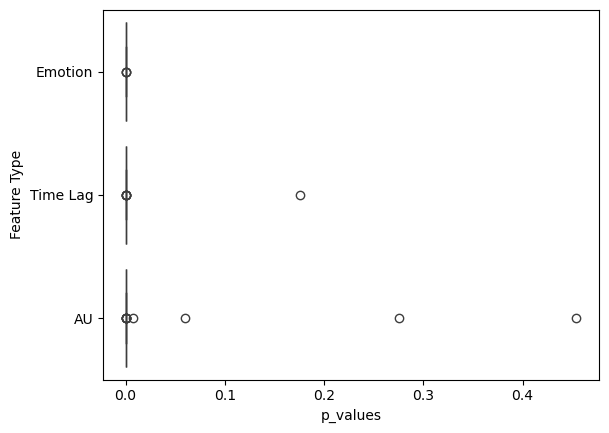

In [23]:
sns.boxplot(feature_score_all,y='Feature Type',x='p_values',hue='Feature Type')
plt.savefig('./image_paper/p_value.png')

In [24]:
# import shap
# # Create the explainer
# explainer1 = shap.Explainer(xgb,X_train)#model_smotesvm

# shap_values = explainer1(X_train, check_additivity=False)
# print("Variable Importance Plot - Global Interpretation")
# # figure = plt.figure()

In [25]:
# shap_values.shape

In [26]:
# shap.plots.beeswarm(shap_values,max_display=100)

In [27]:
feat=feature_score['Input_Features'].to_list()[:20]

In [28]:
# for num in ['P19.csv']:
#     train = pd.read_csv(f'{base_path}/{num}')
#     train=train.set_index('img_name')
#     duplicate_rows = train.index.duplicated()
#     train=train.loc[~duplicate_rows,:]
#     add_data=pd.read_csv(f'{add_data_path}/{num}')
#     add_data=add_data.drop('Unnamed: 0',axis=1)
#     add_data=add_data.set_index('img_name')
#     duplicate_rows = add_data.index.duplicated()
#     add_data=add_data.loc[~duplicate_rows,:]
#     train_=pd.concat([add_data,train],axis=1)
#     train_=train_.reset_index()
#     train_=train_.dropna()
#     train_=train_.drop(['timestamp','ID'],axis=1)
#     break


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsTransformer
from sklearn.cluster import DBSCAN
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,\
f1_score,precision_score,recall_score,roc_auc_score
from imblearn.over_sampling import SMOTE

k=1

# f1=[]
# accuracy=[]
# precision=[]
# recall=[]
# roc_auc=[]
# model=[]
sm=SMOTE()
for i in range(5):
    train_list=[]
    test_list=[]
    # Scramble
    random.seed(int.from_bytes(os.urandom(4), 'big'))
    only1 = [key for key, value in depression.items() if value[0] == 1 and len(value) == 1]
    only0 = [key for key, value in depression.items() if value[0] == 0 and len(value) == 1]
    both = [key for key, value in depression.items() if len(value) == 2]
    # testPerson = ['08'] + ['24']#['16','08'] + ['24','30']
#     testPerson = [str(random.choice(only0).split('.')[0].split('P')[1])] \
#     + [str(random.choice(only1).split('.')[0].split('P')[1])]
#     # testPerson = [13,17]
#     allPerson = [int(a.split('.')[0].split('P')[1]) for a in contestants]
#     trainPerson = [a for a in allPerson if str(a) not in testPerson]
    testPerson = random.sample(only0,k) \
    + random.sample(only1,k)
    # testPerson = [13,17]
    allPerson = contestants
    trainPerson = [a for a in allPerson if str(a) not in testPerson]

#     # Merge train data and shuffle
#     train_list = [pd.read_csv(f'{base_path}/P{str(num).zfill(2)}.csv') for num in trainPerson]
#     merged_train = pd.concat(train_list, ignore_index=True)
#     shuffled_train = merged_train.sample(frac=1, random_state=42).reset_index(drop=True)
#     shuffled_train = shuffled_train.drop([ 'img_name'], axis = 1)

#     test_list = [pd.read_csv(f'{base_path}/P{str(num).zfill(2)}.csv') for num in testPerson]
#     merged_test = pd.concat(test_list, ignore_index=True)
#     shuffled_test = merged_test.sample(frac=1, random_state=42).reset_index(drop=True)
#     shuffled_test = shuffled_test.drop([ 'img_name'], axis = 1)
    for num in trainPerson:
        train = pd.read_csv(f'{base_path}/{num}')
        train=train.set_index('img_name')
        duplicate_rows = train.index.duplicated()
        train=train.loc[~duplicate_rows,:]
        add_data=pd.read_csv(f'{add_data_path}/{num}')
        add_data=add_data.drop(['Unnamed: 0','level'],axis=1)
        add_data=add_data.set_index('img_name')
        duplicate_rows = add_data.index.duplicated()
        add_data=add_data.loc[~duplicate_rows,:]
        train_=pd.concat([train,add_data],axis=1)
        train_=train_.reset_index()
        train_=train_.dropna()
        train_=train_.drop(['timestamp','ID'],axis=1)
        train_list.append(train_)
    
    merged_train = pd.concat(train_list, ignore_index=True)
    shuffled_train = merged_train.sample(frac=1, random_state=42).reset_index(drop=True)
    shuffled_train = shuffled_train.drop([ 'img_name'], axis = 1)

    for num in testPerson:
        test = pd.read_csv(f'{base_path}/{num}')
        test=test.set_index('img_name')
        duplicate_rows = test.index.duplicated()
        test=test.loc[~duplicate_rows,:]
        add_data=pd.read_csv(f'{add_data_path}/{num}')
        add_data=add_data.drop(['Unnamed: 0','level'],axis=1)
        add_data=add_data.set_index('img_name')
        duplicate_rows = add_data.index.duplicated()
        add_data=add_data.loc[~duplicate_rows,:]
        test_=pd.concat([test,add_data],axis=1)
        test_=test_.reset_index()
        test_=test_.dropna()
        test_=test_.drop(['timestamp','ID'],axis=1)
        test_list.append(test_)
    merged_test = pd.concat(test_list, ignore_index=True)
    shuffled_test = merged_test.sample(frac=1, random_state=42).reset_index(drop=True)
    shuffled_test = shuffled_test.drop(['img_name'], axis = 1)

    X_train, y_train = shuffled_train.drop('level', axis = 1), shuffled_train['level']

    X_test, y_test = shuffled_test.drop('level', axis = 1), shuffled_test['level']
    y_train =y_train.astype('category')
    y_test =y_test.astype('category')
    X_train=X_train[feat]
    X_test=X_test[feat]
    X_train, y_train = sm.fit_resample(X_train, y_train)
    X_train=pd.DataFrame(X_train,columns=X_test.columns)
    # y_train=pd.DataFrame(y_train,columns=y_test.columns)
    # Print train test contestants
    print("Train: ", trainPerson)
    print("Test: ", testPerson)
    

    # Logistic Regression
    # log_reg = LogisticRegression(max_iter=10000)
    # log_reg.fit(X_train, y_train)
    # log_reg_pred = log_reg.predict(X_test)
    # log_reg_acc = classification_report(y_test, log_reg_pred)
    # print(f"Logistic Regression Accuracy:", log_reg_acc)

    # K-Nearest Neighbors (KNN)
    knn = KNeighborsClassifier(n_neighbors=100)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    knn_rp = classification_report(y_test, knn_pred)
    accuracy.append(accuracy_score(y_test, knn_pred))
    f1.append(f1_score(y_test, knn_pred,average='macro'))
    precision.append(precision_score(y_test, knn_pred,average='macro'))
    recall.append(recall_score(y_test, knn_pred,average='macro'))
    roc_auc.append(roc_auc_score(y_test, knn_pred))
    model.append('KNN')
    print('knn ',i)
    print(knn_rp)
    
    
#     # Support Vector Machine (SVM)
#     svm = SVC(kernel='rbf')  # You can also try 'rbf' or 'poly'
#     svm.fit(X_train, y_train)
#     svm_pred = svm.predict(X_test)
#     svm_rp = classification_report(y_test, svm_pred)
#     accuracy.append(accuracy_score(y_test, svm_pred))
#     f1.append(f1_score(y_test, svm_pred,average='macro'))
#     precision.append(precision_score(y_test, svm_pred,average='macro'))
#     recall.append(recall_score(y_test, svm_pred,average='macro'))
#     roc_auc.append(roc_auc_score(y_test, svm_pred))
#     model.append('SVM')
#     print('SVM ',i)
#     print(svm_rp)

#     # Random Forest Classifier
#     rf = RandomForestClassifier(n_estimators=1000)
#     rf.fit(X_train, y_train)
#     rf_pred = rf.predict(X_test)
#     rf_acc = classification_report(y_test, rf_pred)
#     print('rf ',i)
#     print(rf_acc)

#     xgb = XGBClassifier(n_estimators=1000)
#     xgb.fit(X_train, y_train)
#     xgb_pred = xgb.predict(X_test)
#     xgb_acc = classification_report(y_test, xgb_pred)
#     print('xgb ',i)
#     print(xgb_acc)

#     # Neural Network (MLP Classifier)
#     mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10000)
#     mlp.fit(X_train, y_train)
#     mlp_pred = mlp.predict(X_test)
#     mlp_acc = classification_report(y_test, mlp_pred)
#     print('MLP ',i)
#     print(mlp_acc)


KeyError: "['disgust_time_lag', 'fear_time_lag', 'happiness_time_lag', 'sadness_time_lag', 'surprise_time_lag', 'AU01_time_lag', 'AU02_time_lag', 'AU05_time_lag', 'AU06_time_lag', 'AU07_time_lag', 'AU09_time_lag', 'AU10_time_lag', 'AU12_time_lag', 'AU14_time_lag', 'AU15_time_lag', 'AU20_time_lag', 'AU23_time_lag', 'AU24_time_lag', 'AU25_time_lag'] not in index"

In [ ]:
df_result=pd.DataFrame(np.array([f1,accuracy,precision,recall,roc_auc,model]).T,
                       columns=['f1','acccuracy','precision','recall','roc_auc','model'])
df_result2=df_result.iloc[:,:-1].astype(float)
df_result2['model']=df_result['model']
df_result2.groupby('model').describe().T

In [ ]:
(only0, only1, both)

In [ ]:
merged_test.shape

In [ ]:
merged_train.shape

In [ ]:
person_len = dict()
for e in depression:
    person_len[e] = len(pd.read_csv(f'{base_path}/{e}'))
person_len = (sorted(person_len.items()))
person_len